# <span style="color:red"> Эконометрический анализ датасета  

## Новгородцевой Екатерины,
## 2МЭО2

In [645]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import scipy
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
import plotly.express as px
import patsy
import statsmodels.stats.api as sms 
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from scipy.stats import t
from scipy.stats import f 
from scipy.stats import chi2 
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import linear_harvey_collier

In [652]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/zhanna11111/homework111111/main/CarPrice_Assignment.csv')
df_cars.shape # показывает формат rows x columns

(205, 26)

In [653]:
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Изучаемый датасет содержит ряд показателей, таких как:
- CarName - показатель, отражающий марку и модель транспортного средства $(categorial)$
- fueltype - показатель, характеризующий тип топлива транспортного средства $(categorial)$
- aspiration - показатель, отражающий аспирацию транспортного средства $(categorial)$
- doornumber - показатель, отражающий количество дверей в транспортного средства $(categorial)$
- carbody - показатель, отражающий тип кузова транспортного средства $(categorial)$
- drivewheel - показатель, характеризующий  тип привода транспортного средства $(categorial)$
- enginelocation - показатель, характеризующий расположение двигателя $(categorial)$
- wheelbase - показатель, выражающий колёсную базу (дюймы) 
- carlength - показатель, отражающий длину транспортного средства (дюймы)
- carwidth - покатель, отражающий ширину транспортного средства (дюймы)
- carheight - показатель, отражающий высоту транспортного средства (дюймы)
- curbweight - показатель, выражающий снаряжённую массу транспортного средства - максимальную собственную массу транспортного средства с полной загрузкой топливом и и необходимыми для движения материалами (кг)
- enginetype - показатель, отражающий тип двигателя транспортного средства $(categorial)$
- cylindernumber - показатель, отражающий количество цилиндров в транспортном средстве (шт.)
- enginesize - показатель, отражающий объём двигателя транспортного средства (кубические см)
- horsepower - показатель, выражающий количество лошадиных сил транспортного средства (лошадиные силы)
- price - показатель, выражающий стоимость автомобиля (доллары США)

In [447]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [448]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [449]:
# Для того, чтобы не акцентировать внимание на модели машины, а сфокусироваться на марке:
CompanyName = df_cars["CarName"].apply(lambda x: x.split(" ")[0])
df_cars.insert(2,"CompanyName", Company_Name)
df_cars.drop(columns=["CarName"],inplace=True)

In [450]:
df_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [451]:
df_cars['CompanyName'].unique() #показывает ряд значений определённого показателя - CarName

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [452]:
# Ввиду того, что изначально в датасете содержатся опечатки, необходимо это исправить
def replace(a,b):
    df_cars["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [453]:
df_cars['CompanyName'].unique() #показывает ряд значений определённого показателя - CarName\

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [454]:
df_cars['fueltype'].unique() #показывает ряд значений определённого показателя - fueltype

array(['gas', 'diesel'], dtype=object)

In [455]:
df_cars['aspiration'].unique() #показывает ряд значений определённого показателя - aspiration

array(['std', 'turbo'], dtype=object)

In [456]:
df_cars['doornumber'].unique() #показывает ряд значений определённого показателя - doornumber

array(['two', 'four'], dtype=object)

In [457]:
df_cars['carbody'].unique() #показывает ряд значений определённого показателя - carbody

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [458]:
df_cars['drivewheel'].unique() #показывает ряд значений определённого показателя - drivewheel

array(['rwd', 'fwd', '4wd'], dtype=object)

In [459]:
df_cars['enginelocation'].unique() #показывает ряд значений определённого показателя - enginelocation

array(['front', 'rear'], dtype=object)

In [460]:
df_cars['wheelbase'].unique() #показывает ряд значений определённого показателя - wheelbase

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [461]:
df_cars['carlength'].unique() #показывает ряд значений определённого показателя - carlength

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [462]:
df_cars['carwidth'].unique() #показывает ряд значений определённого показателя - carwidth

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [463]:
df_cars['carheight'].unique() #показывает ряд значений определённого показателя - carheight

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [464]:
df_cars['curbweight'].unique() #показывает ряд значений определённого показателя - curbheight

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [465]:
df_cars['enginetype'].unique() #показывает ряд значений определённого показателя - enginetype

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [466]:
df_cars['cylindernumber'].unique() #показывает ряд значений определённого показателя - cylindernumber

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [467]:
df_cars['enginesize'].unique() #показывает ряд значений определённого показателя - enginesize

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [468]:
df_cars['horsepower'].unique() #показывает ряд значений определённого показателя - horsepower

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

In [469]:
df_cars['price'].unique() #показывает ряд значений определённого показателя - price

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

# Рассмотрим более подробно значения переменных

In [470]:
CompanyName_stats = df_cars['CompanyName'].value_counts()
print(CompanyName_stats)

toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Nissan          1
Name: CompanyName, dtype: int64


##### <span style="color:gray"> Так, марка toyota является наиболее популярной на рынке

In [471]:
fueltype_stats = df_cars['fueltype'].value_counts()
print(fueltype_stats)

gas       185
diesel     20
Name: fueltype, dtype: int64


##### <span style="color:gray"> Следовательно, дизельные модели автомобилей пользуются меньшим спросом 

In [472]:
aspiration_stats = df_cars['aspiration'].value_counts()
print(aspiration_stats)

std      168
turbo     37
Name: aspiration, dtype: int64


##### <span style="color:gray"> Следовательно, наиболее популярна стандартная заводская прошивка двигателя, не отличающаяся улучшением его заводских характерстик 

In [473]:
doornumber_stats = df_cars['doornumber'].value_counts()
print(doornumber_stats)

four    115
two      90
Name: doornumber, dtype: int64


##### <span style="color:gray"> Следовательно, двудверные автомобили пользуются меньшим спросом примерно в 1,3 раза

In [474]:
carbody_stats = df_cars['carbody'].value_counts()
print(carbody_stats)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


##### <span style="color:gray"> Так, наиболее популярным типом кузова является седан, наименее популярным - кабриолет

In [475]:
drivewheel_stats = df_cars['drivewheel'].value_counts()
print(drivewheel_stats)

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


##### <span style="color:gray"> Следовательно, потребитель чаще выбирает переднеприводный автомобиль
    

In [476]:
enginelocation_stats = df_cars['enginelocation'].value_counts()
print(enginelocation_stats)

front    202
rear       3
Name: enginelocation, dtype: int64


##### <span style="color:gray"> Следовательно, дизельные модели автомобилей пользуются меньшим спросом 

In [477]:
wheelbase_stats = df_cars['wheelbase'].value_counts()
print(wheelbase_stats)

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64


##### <span style="color:gray"> Так, колёсная база 94,5 дюймов встречается чаще

In [478]:
carlength_stats = df_cars['carlength'].value_counts()
print(carlength_stats)

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, Length: 75, dtype: int64


##### <span style="color:gray"> Так, длина автомобиля 157,3 является наиболее поулярной

In [479]:
carwidth_stats = df_cars['carwidth'].value_counts()
print(carwidth_stats)

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64


##### <span style="color:gray"> Автомобили шириной 63,8 дюймов наиболее популярны среди покупателей 

In [480]:
carheight_stats = df_cars['carheight'].value_counts()
print(carheight_stats)

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64


##### <span style="color:gray"> Следовательно, автомобили высотой 50,8 дюймов наиболее популярны 

In [481]:
curbweight_stats = df_cars['curbweight'].value_counts()
print(curbweight_stats)

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64


##### <span style="color:gray"> Так, 2385 кг - наиболе часто встречающийся показатель снаряжённой массы ТС

In [482]:
enginetype_stats = df_cars['enginetype'].value_counts()
print(enginetype_stats)

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


##### <span style="color:gray"> Следовательно, двигатель ohs наиболее популярен 

In [483]:
cylindernumber_stats = df_cars['cylindernumber'].value_counts()
print(cylindernumber_stats)

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


##### <span style="color:gray"> Таким образом, четырёхцилиндровое ТС наиболее популярно

In [484]:
enginesize_stats = df_cars['enginesize'].value_counts()
print(enginesize_stats)

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64


##### <span style="color:gray"> Двигатели объёмом 122 куба популярнее остальных

In [485]:
horsepower_stats = df_cars['horsepower'].value_counts()
print(horsepower_stats)

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64


##### <span style="color:gray"> Так, автомобили мощностью 68 лошадиных сил наиболее популярны

In [486]:
price_stats = df_cars['price'].value_counts()
print(price_stats)

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64


##### <span style="color:gray"> Таким образом, достаточно сложно сделать вывод о нвиболее часто встречающейся цене автомобиля 

# Визуализируем данные

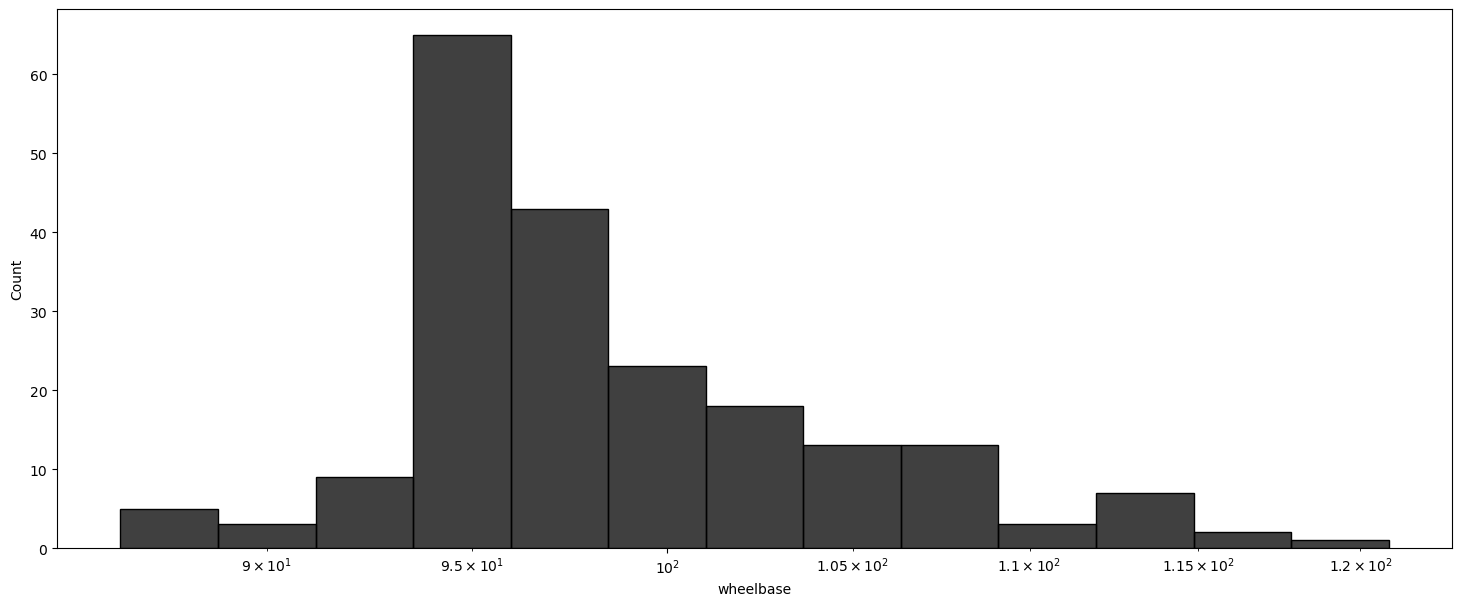

In [487]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='wheelbase', log_scale=True, color='black')
plt.show(sns)

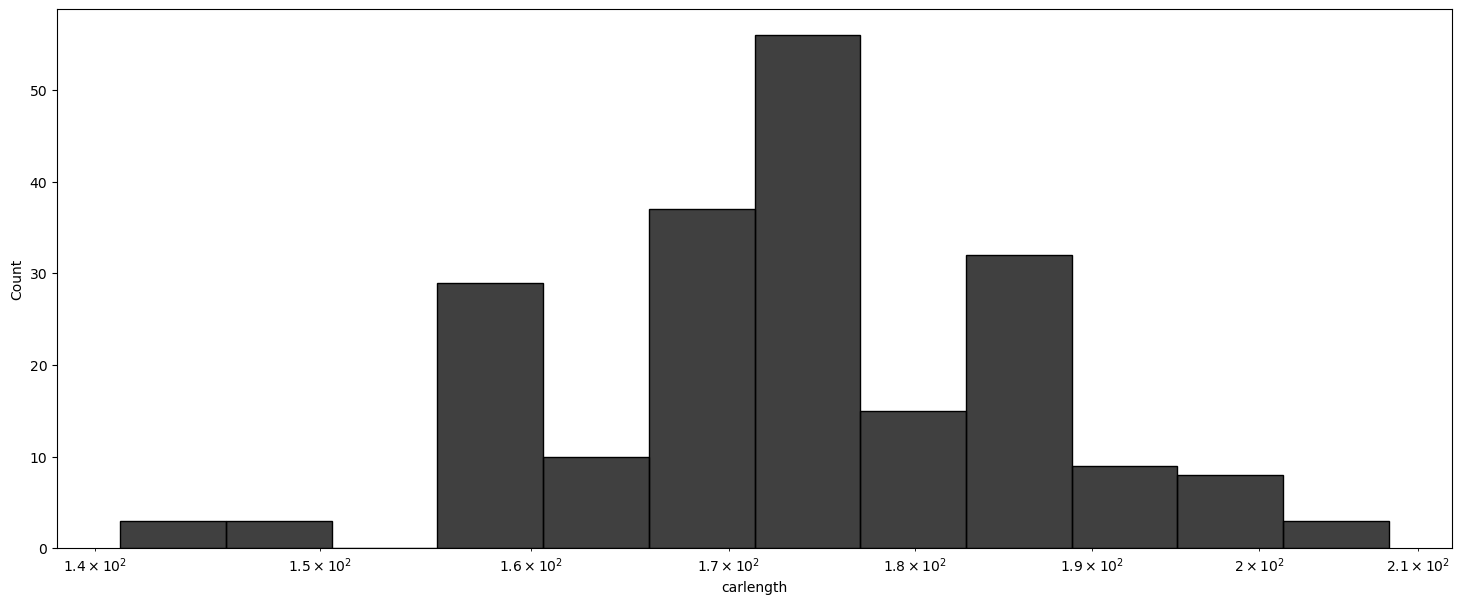

In [488]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='carlength', log_scale=True, color='black')
plt.show(sns)

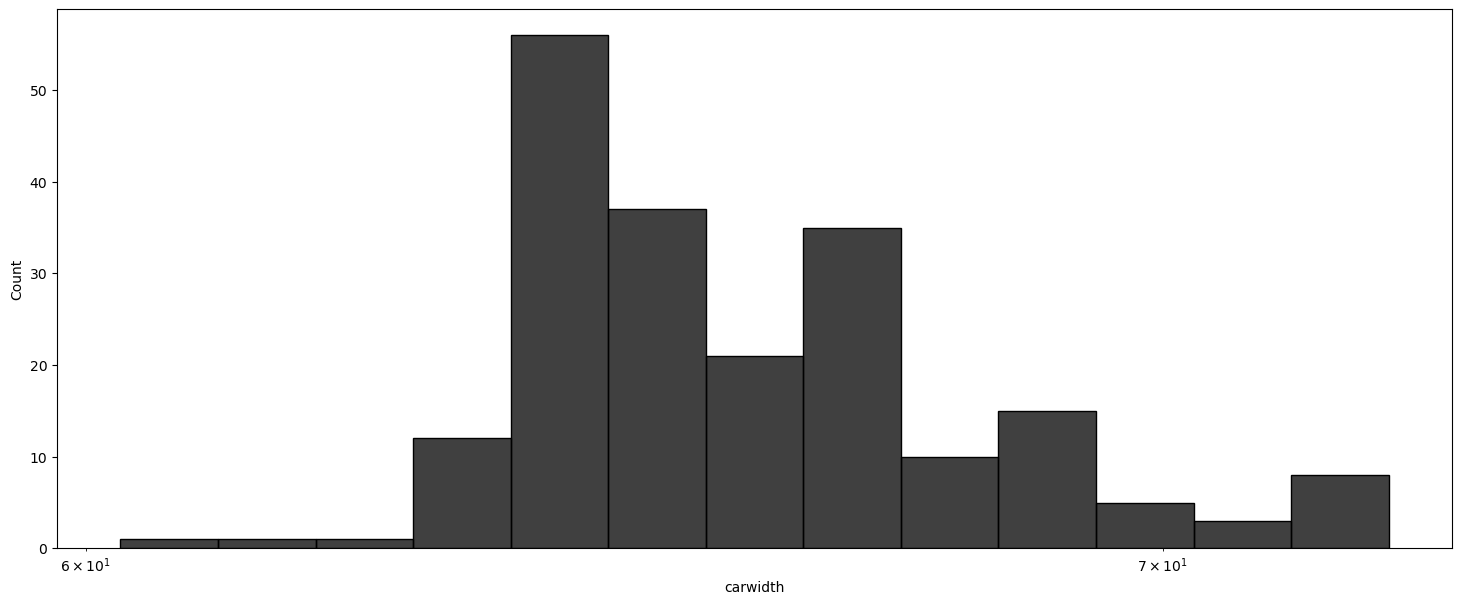

In [489]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='carwidth', log_scale=True, color='black')
plt.show(sns)

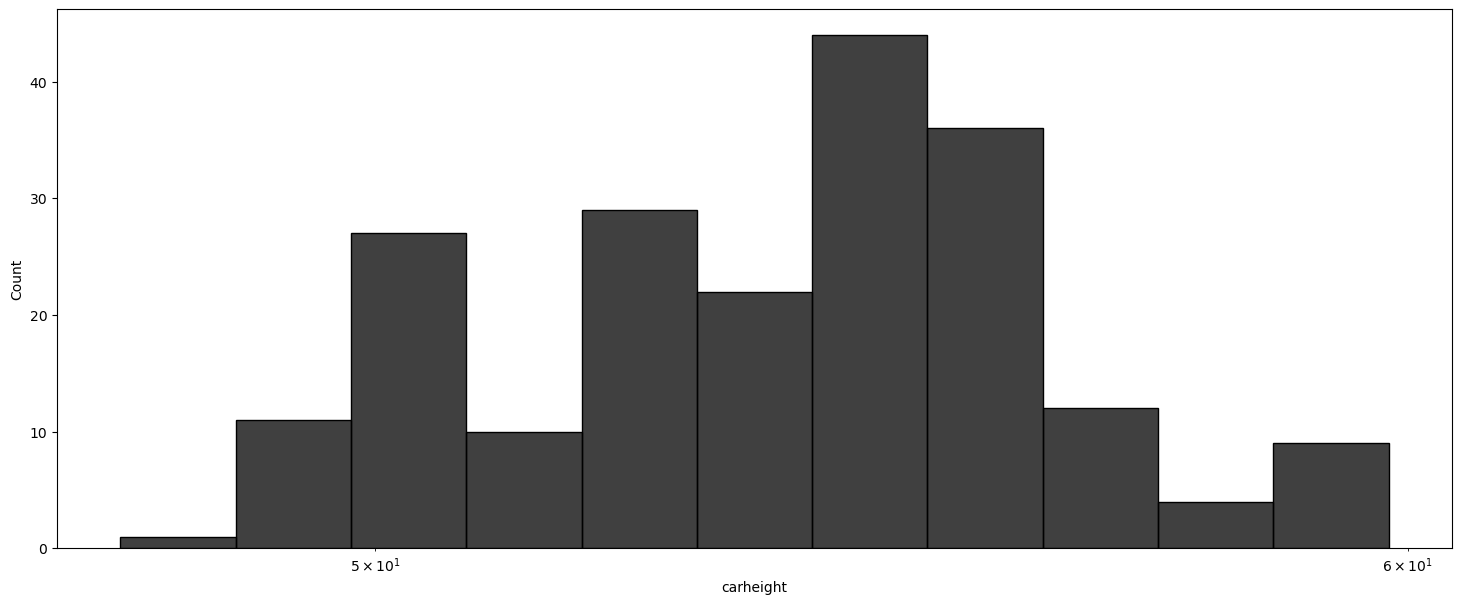

In [490]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='carheight', log_scale=True, color='black')
plt.show(sns)

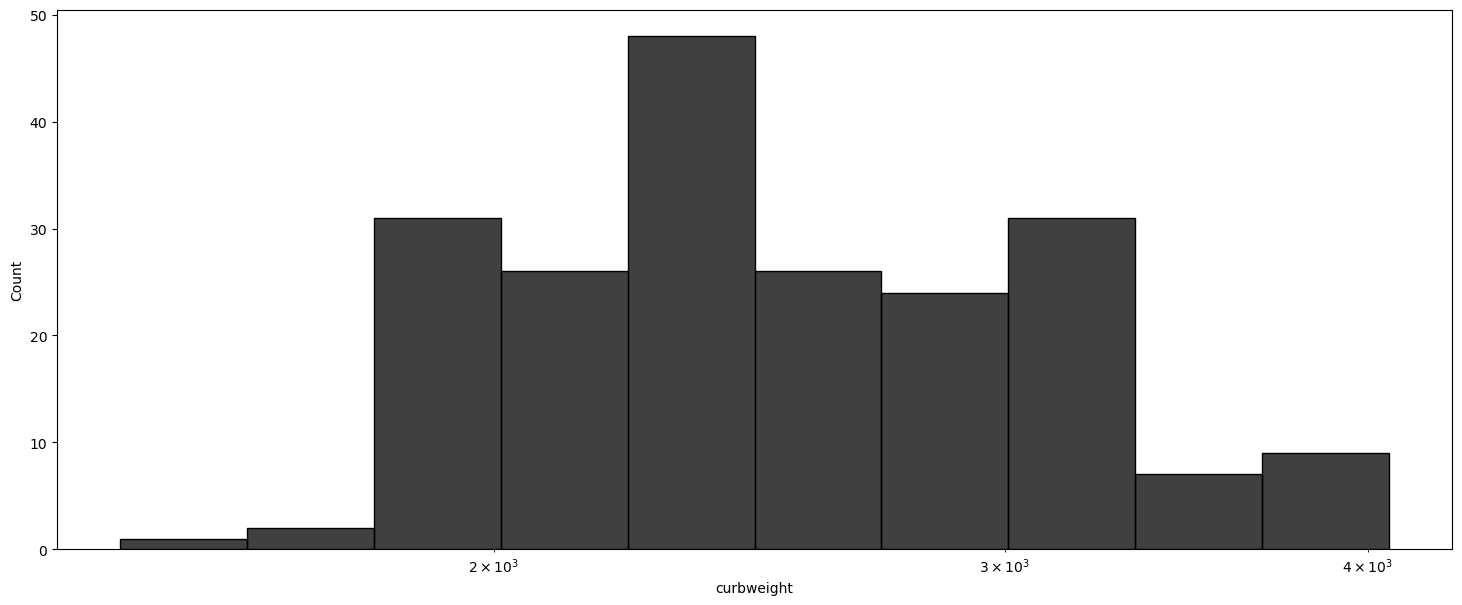

In [491]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='curbweight', log_scale=True, color='black')
plt.show(sns)

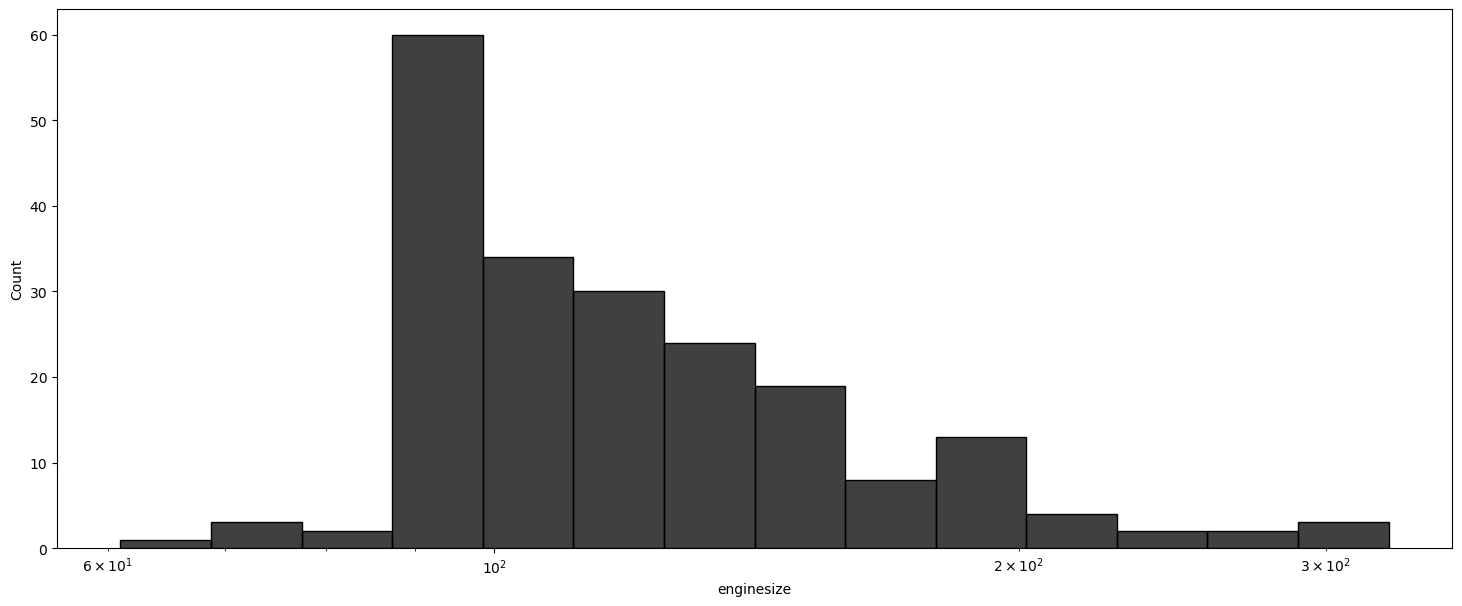

In [492]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='enginesize', log_scale=True, color='black')
plt.show(sns)

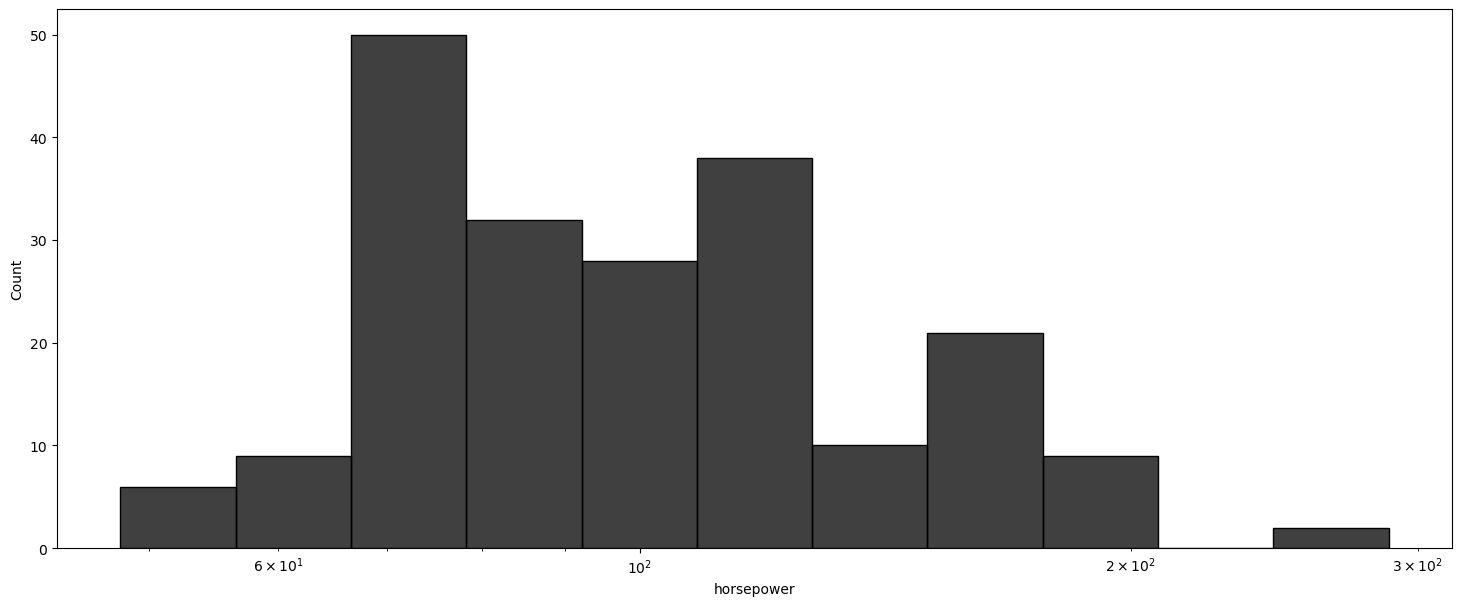

In [493]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='horsepower', log_scale=True, color='black')
plt.show(sns)

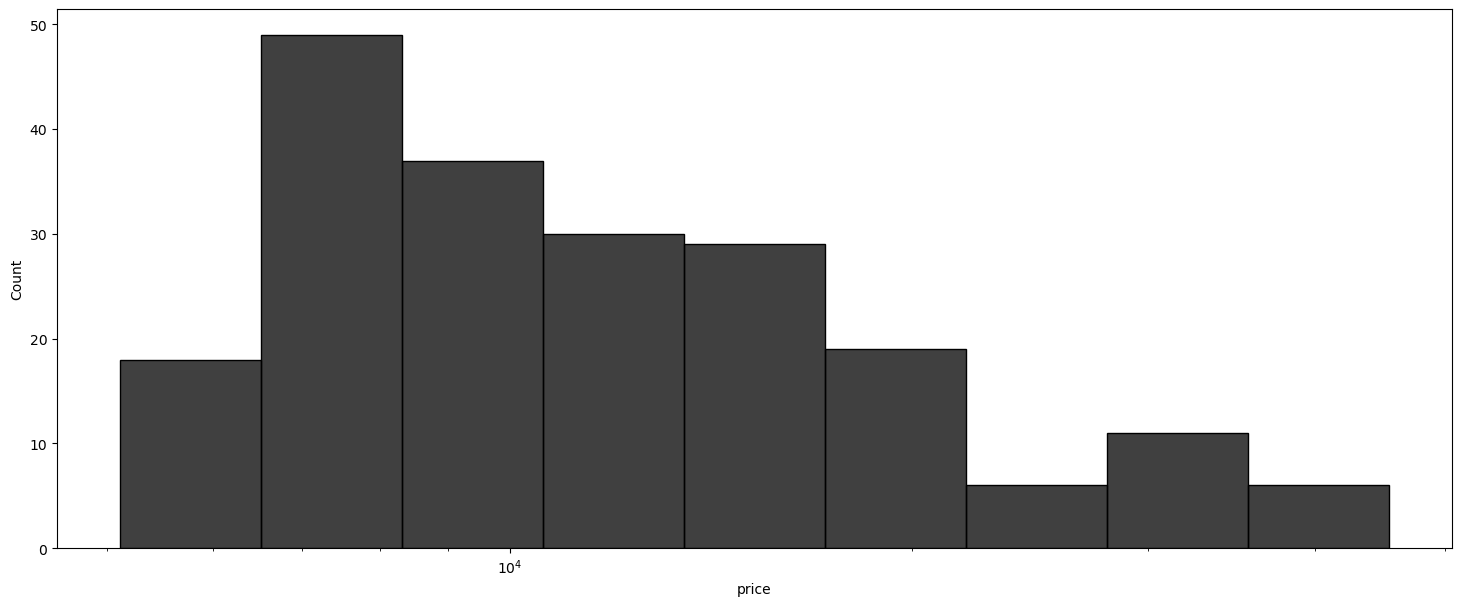

In [494]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_cars, x='price', log_scale=True, color='black')
plt.show(sns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



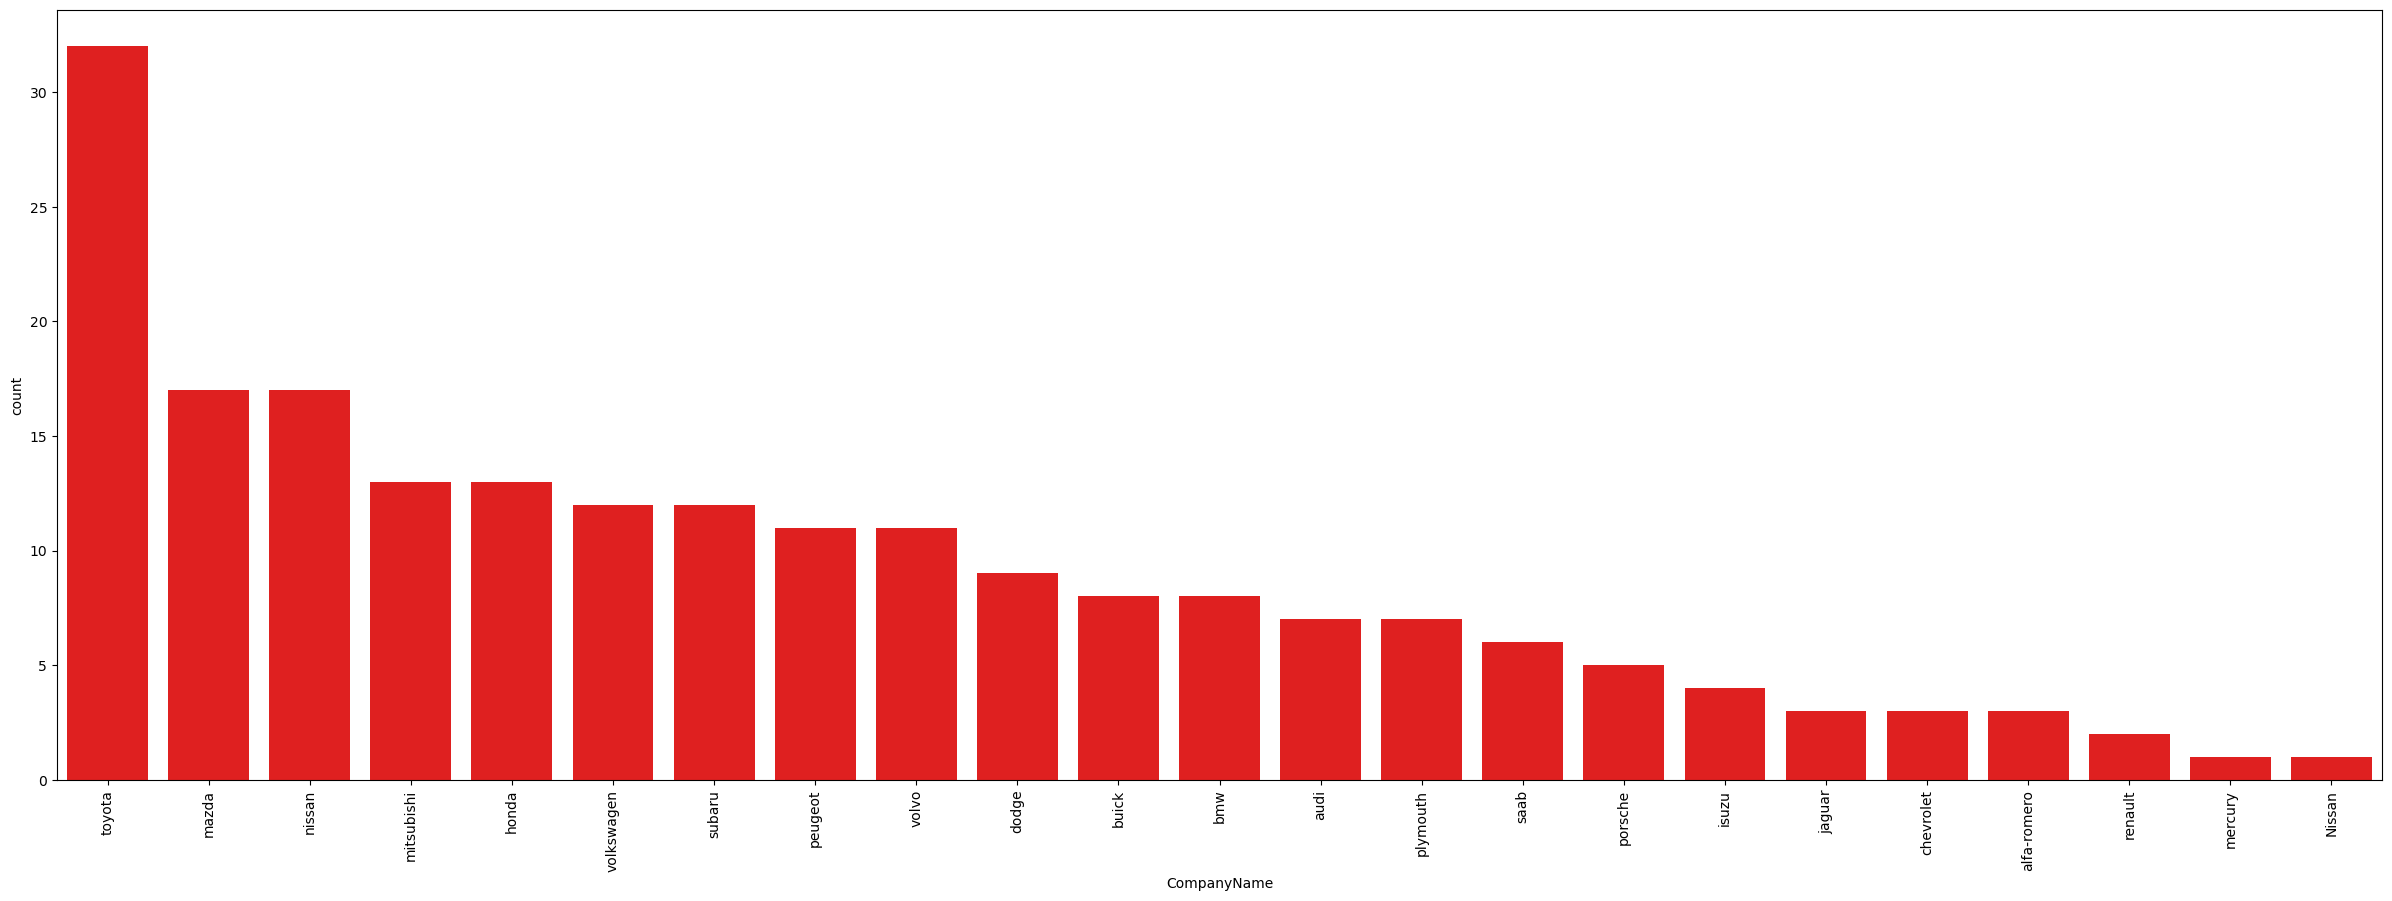

In [495]:
plt.figure(figsize = [30, 10])
sns.countplot(df_cars["CompanyName"],order = df_cars["CompanyName"].value_counts().index, color='red')
plt.xticks(rotation=90)
plt.show()

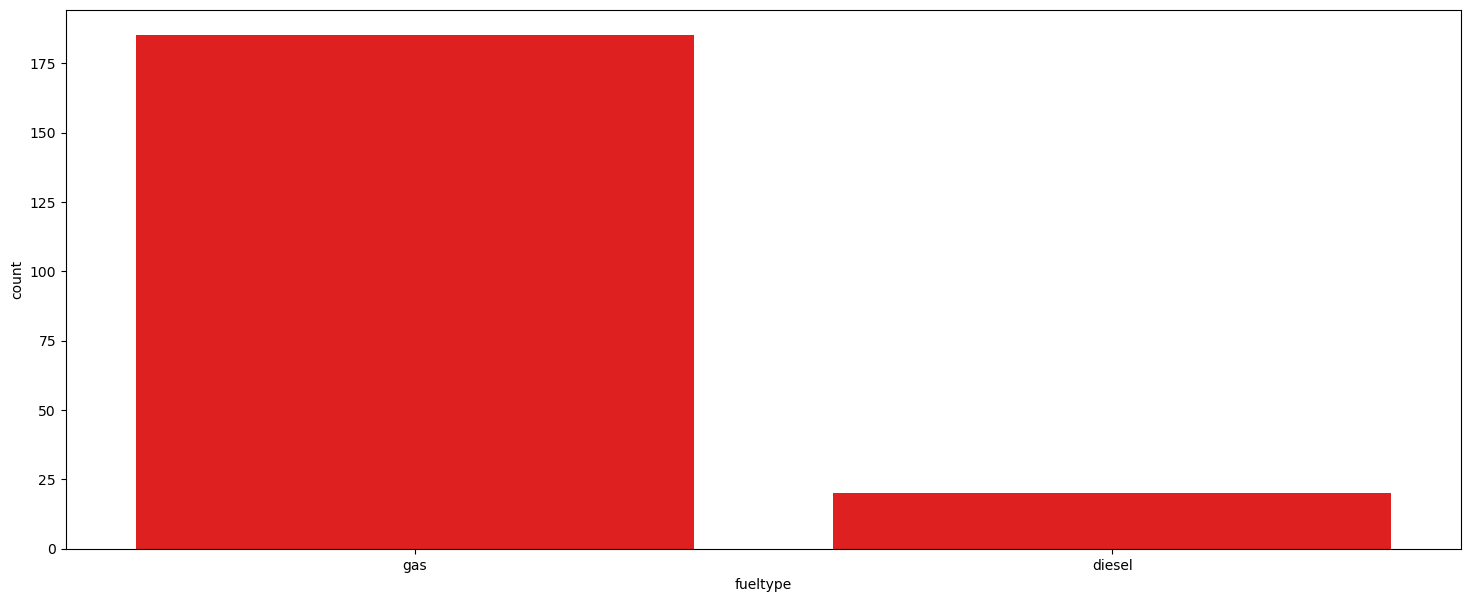

In [496]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='fueltype', color='red')
plt.show(sns)

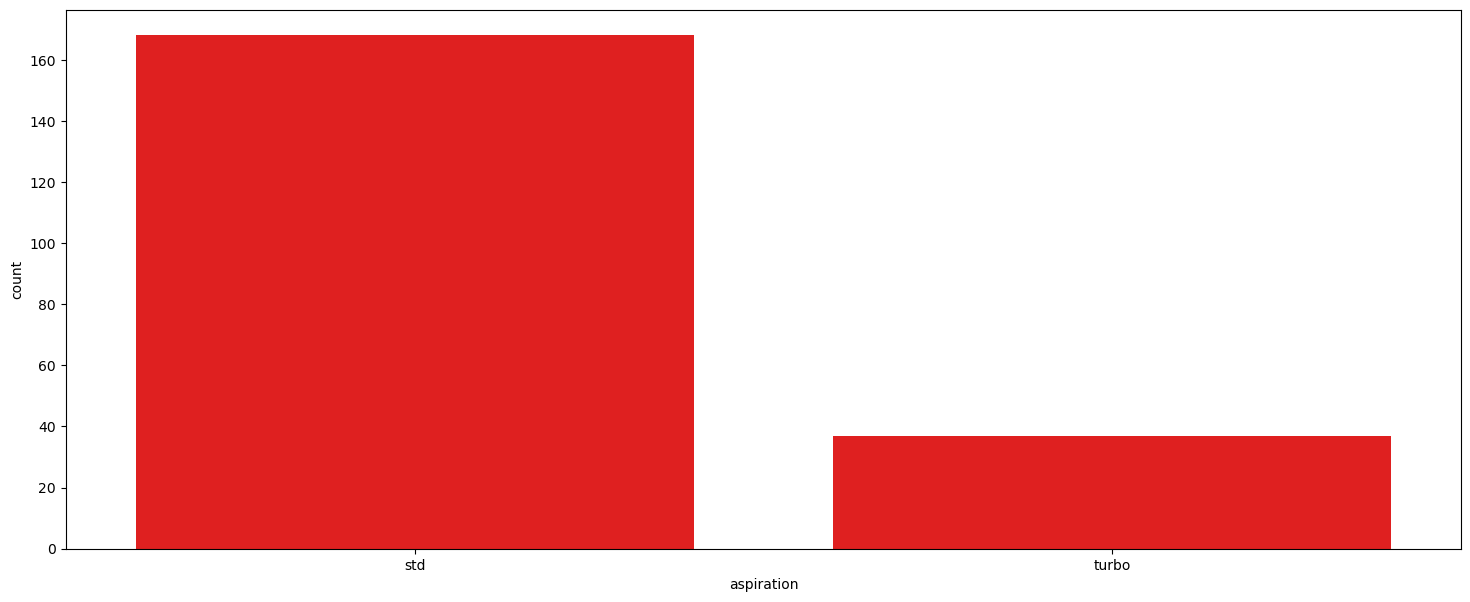

In [497]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='aspiration', color='red')
plt.show(sns)

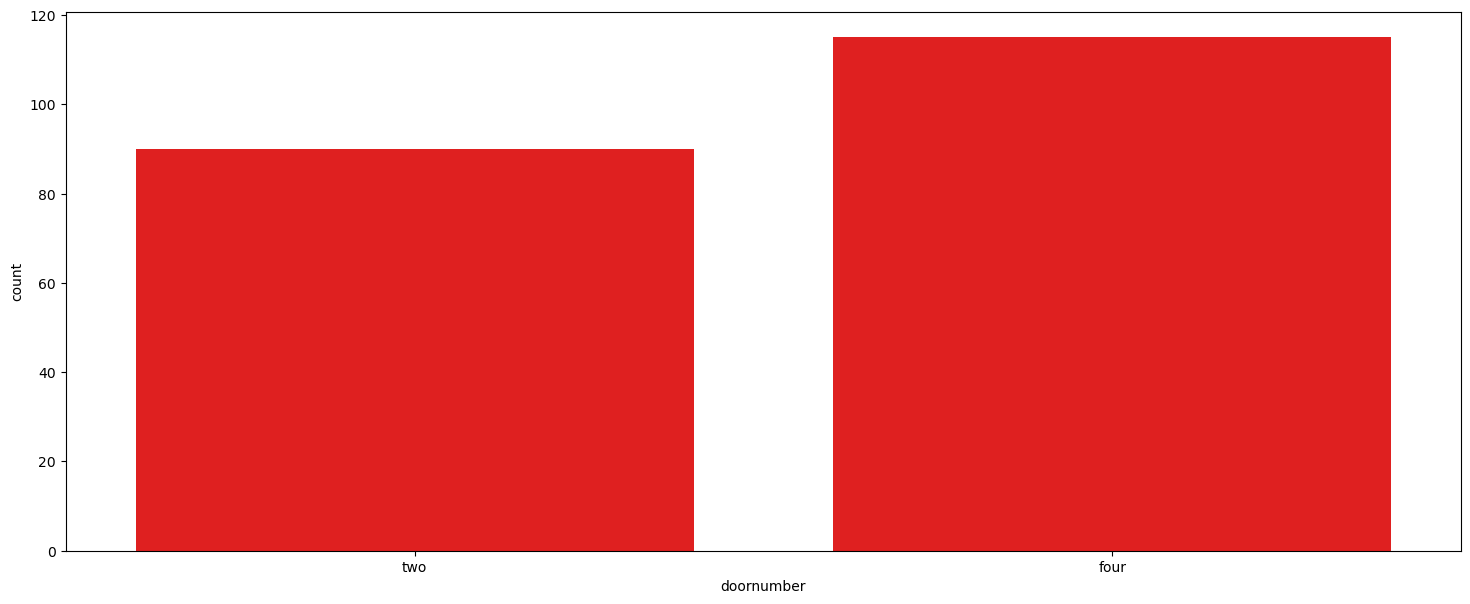

In [498]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='doornumber', color='red')
plt.show(sns)

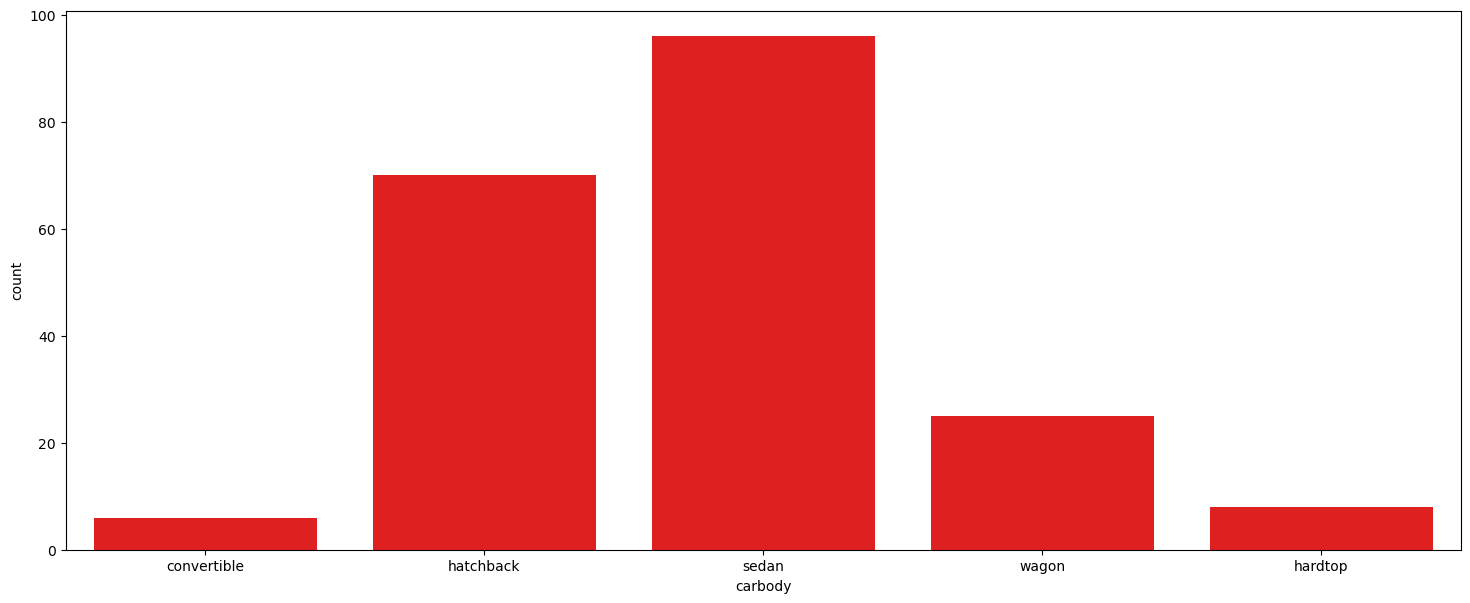

In [499]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='carbody', color='red')
plt.show(sns)

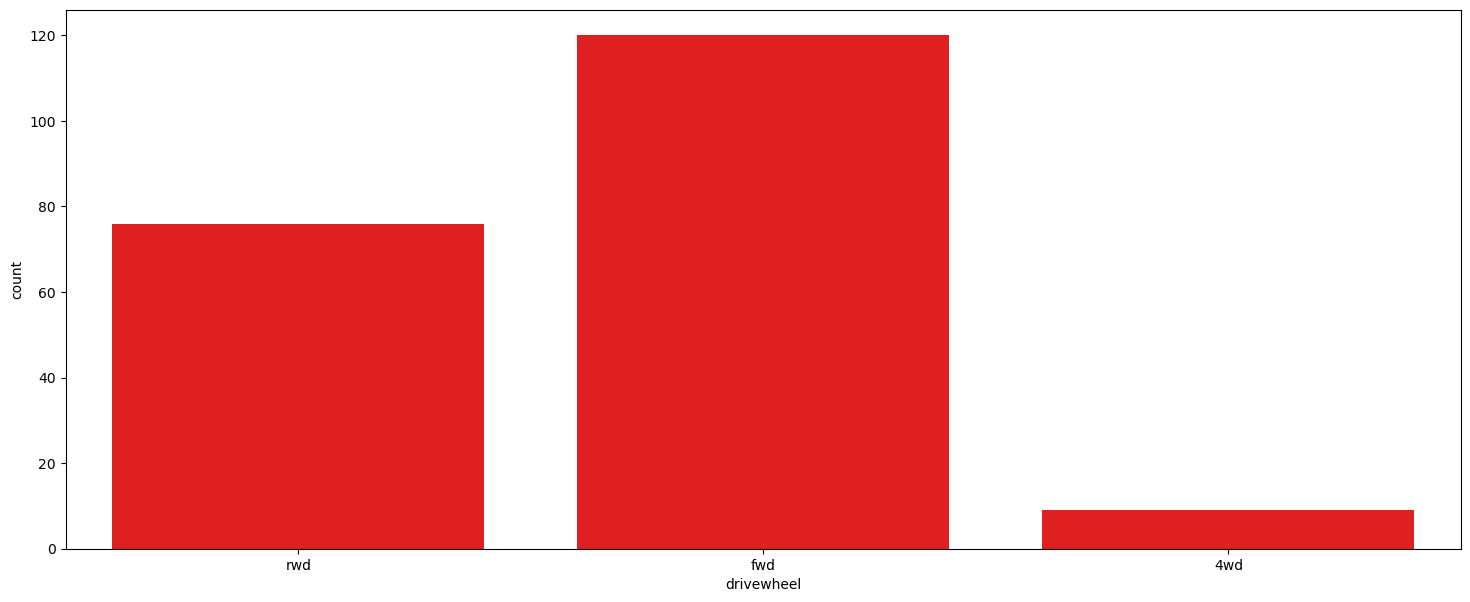

In [500]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='drivewheel', color='red')
plt.show(sns)

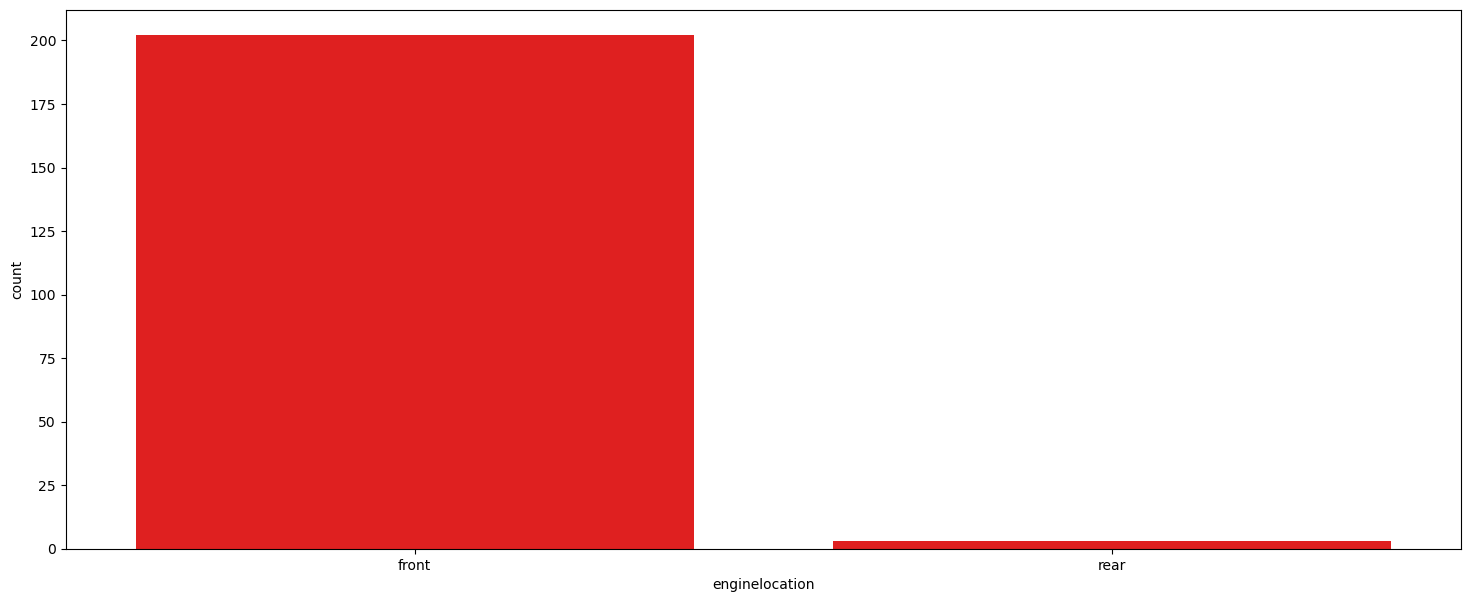

In [501]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='enginelocation', color='red')
plt.show(sns)

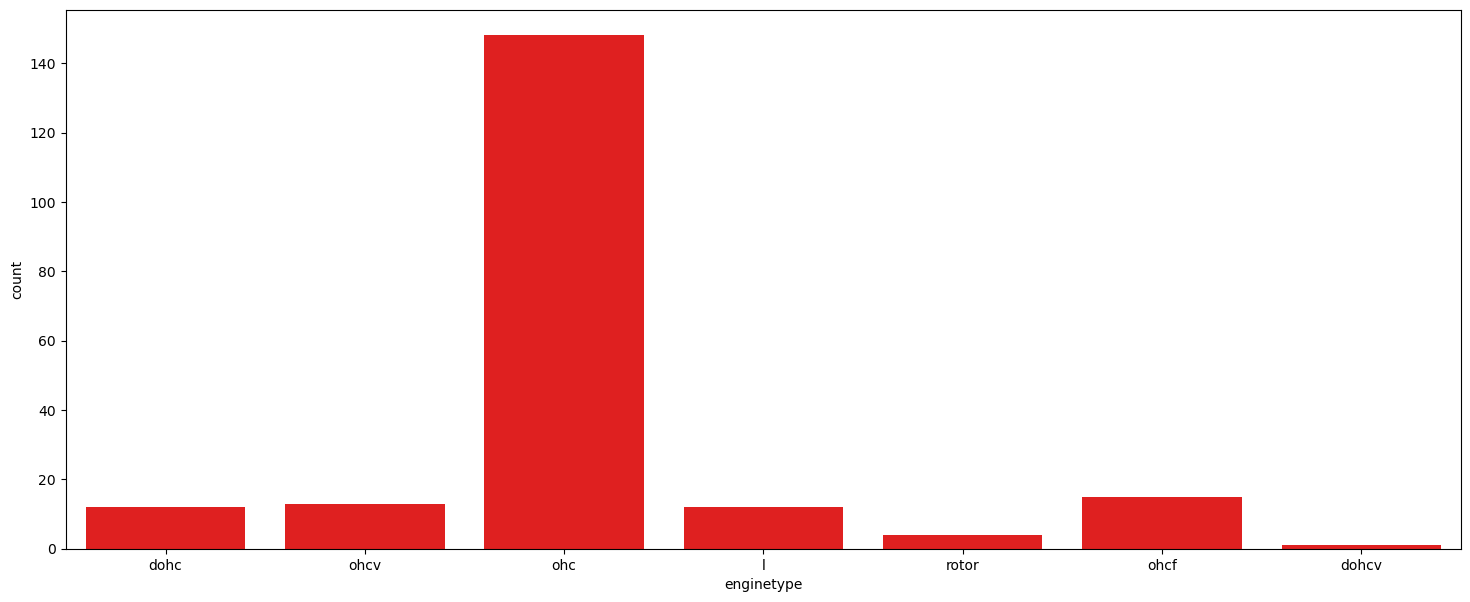

In [502]:
plt.figure(figsize=(18,7))
sns.countplot(data=df_cars, x='enginetype', color='red')
plt.show(sns)

In [503]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and fueltype', color='fueltype')

In [504]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and aspiration', color='aspiration')

In [505]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and doornumber', color='doornumber')

In [506]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and carbody', color='carbody')

In [507]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and drivewheel', color='drivewheel')

In [508]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and enginelocation', color='enginelocation')

In [509]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and carlength', color='carlength')

In [510]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and carwidth', color='carwidth')

In [511]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and carheight', color='carheight')

In [512]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and curbweight', color='curbweight')

In [513]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and enginetype', color='enginetype')

In [514]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and cylindernumber', color='cylindernumber')

In [515]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and enginesize', color='enginesize')

In [516]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and horspower', color='horsepower')

In [517]:
px.histogram(df_cars, x='CompanyName', title='CompanyName and price', color='price')

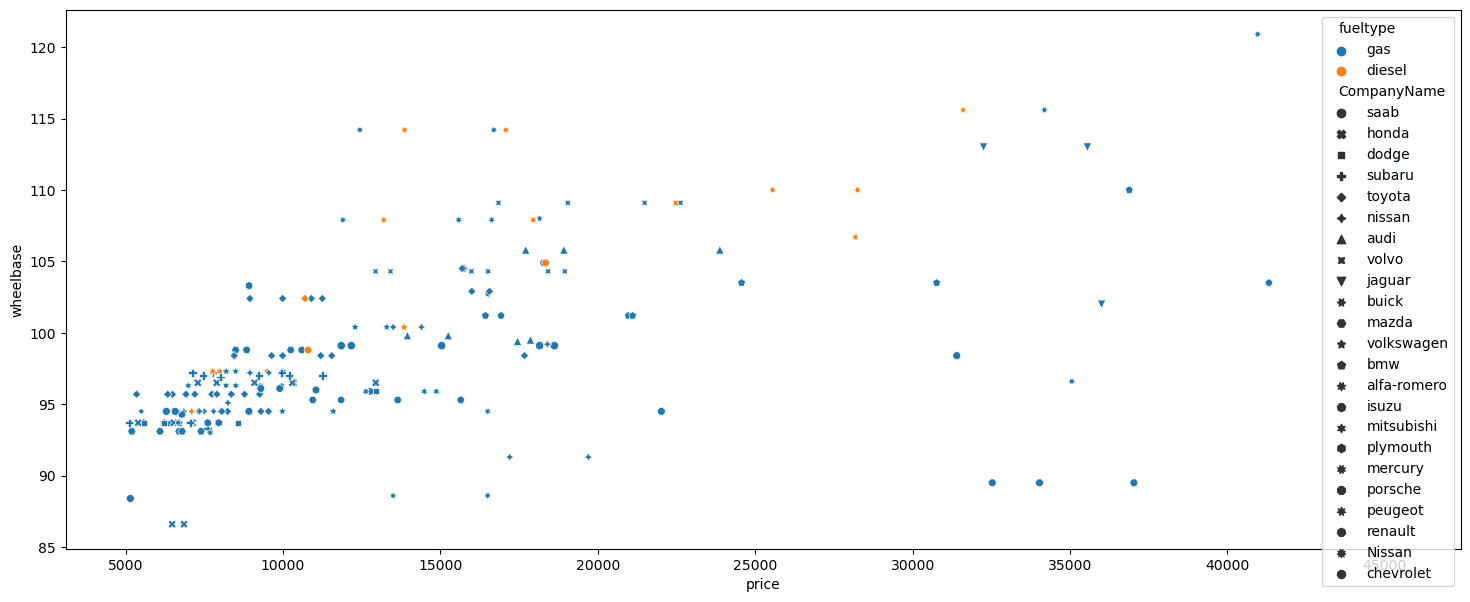

In [518]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df_cars.sample(n = 200), x='price', y='wheelbase', style='CompanyName', hue='fueltype') #Диаграмма для 200 случайных наблюдений
plt.show(sns)

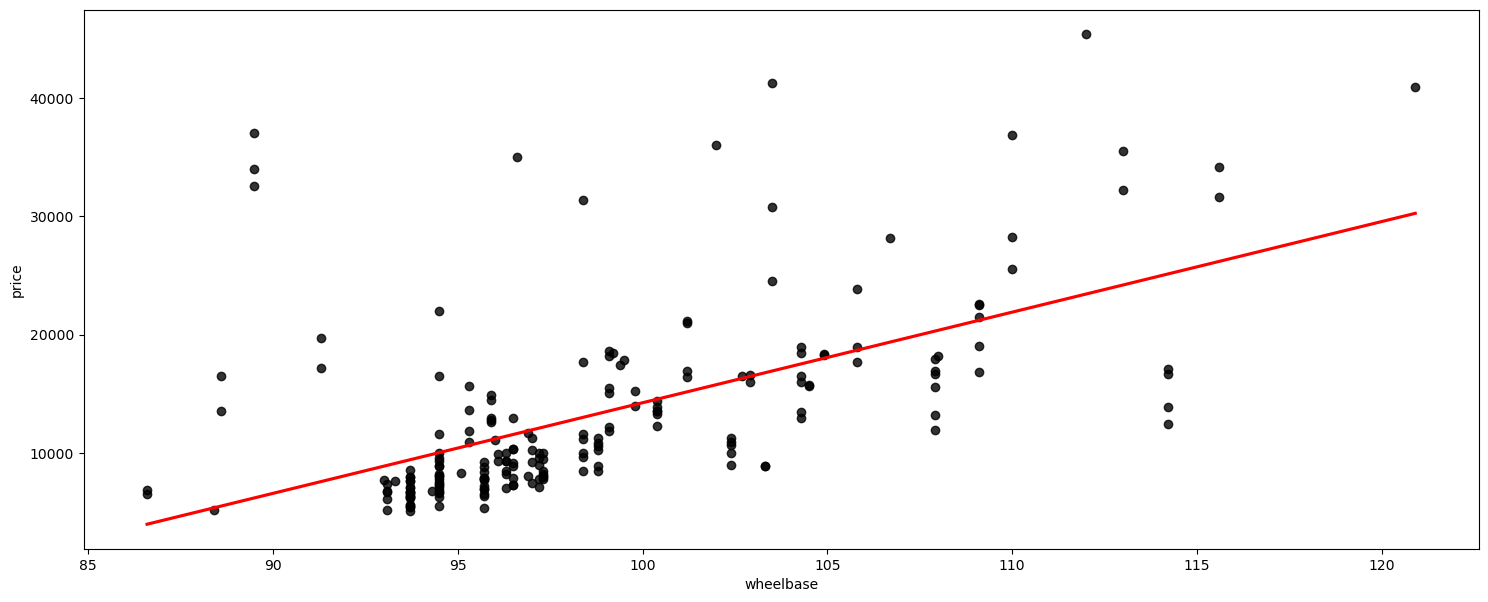

In [519]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='wheelbase', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

   ##### <span style="color:gray"> Так, при увеличении колёсной базы, цена растёт

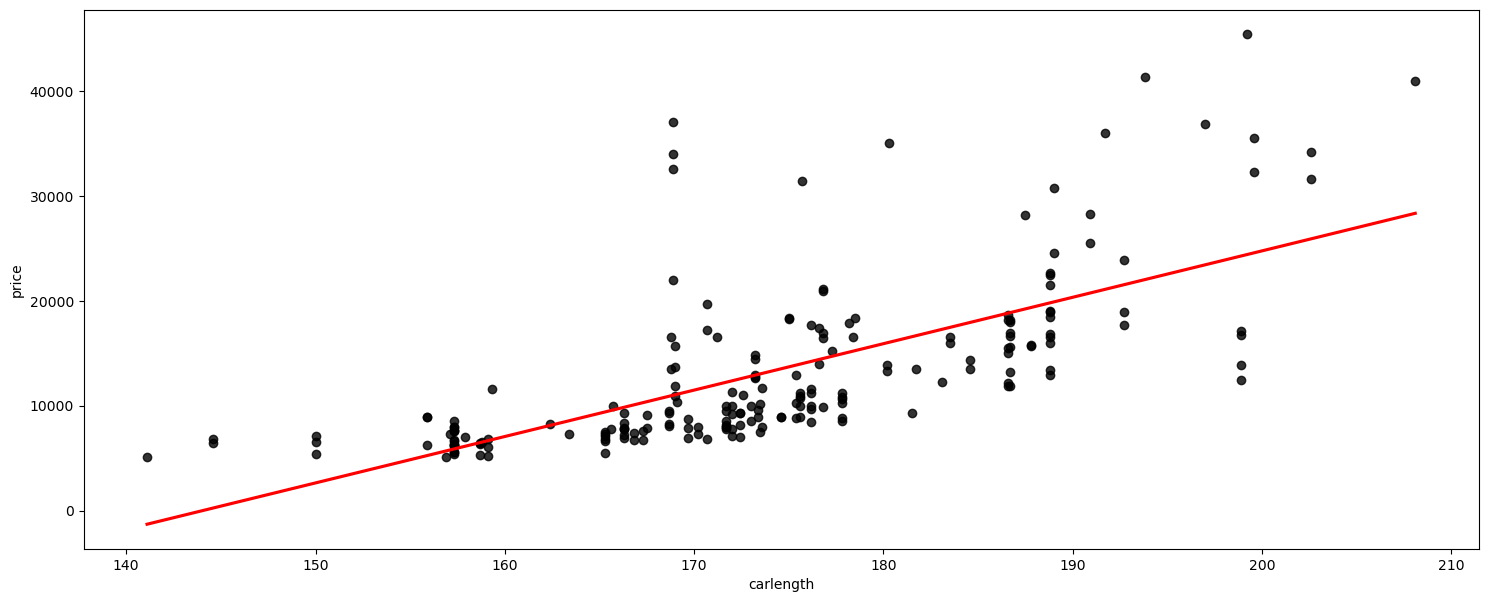

In [520]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='carlength', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> Следовательно, чем длиннее ТС, тем цена выше

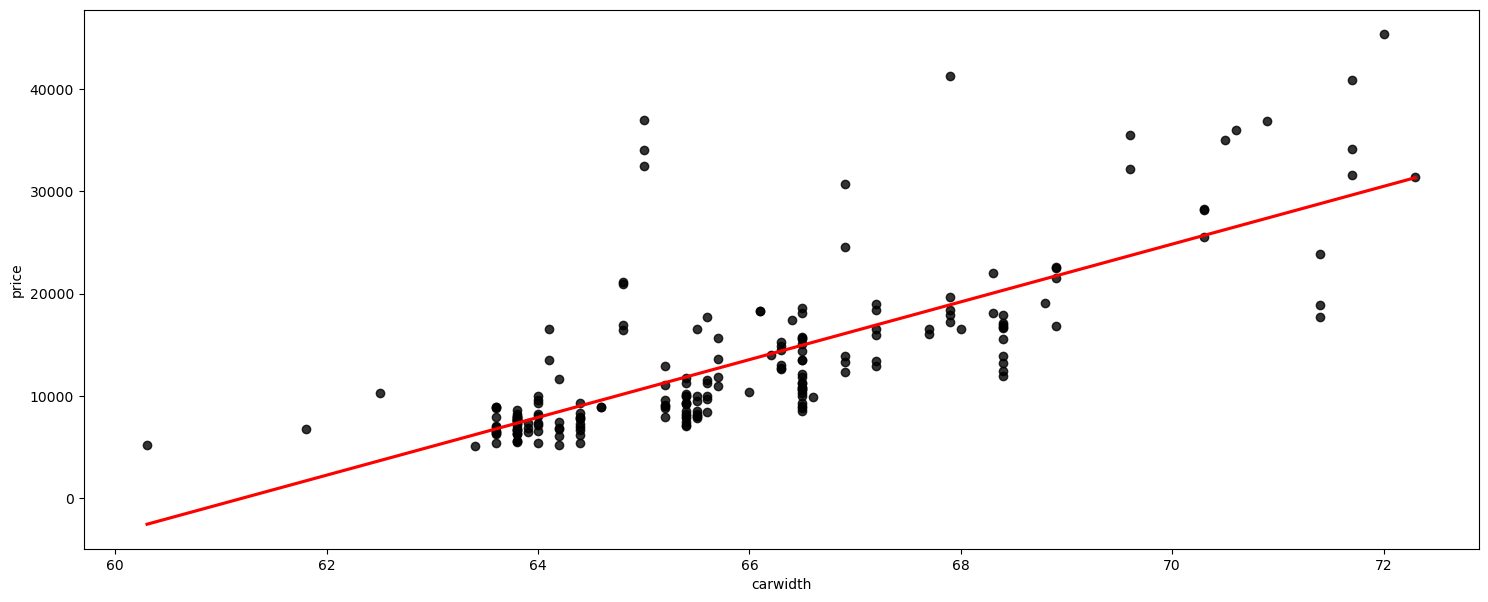

In [521]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='carwidth', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> Таким образом, более высокая цена также является следствием изменения такого параметра ТС, как ширина

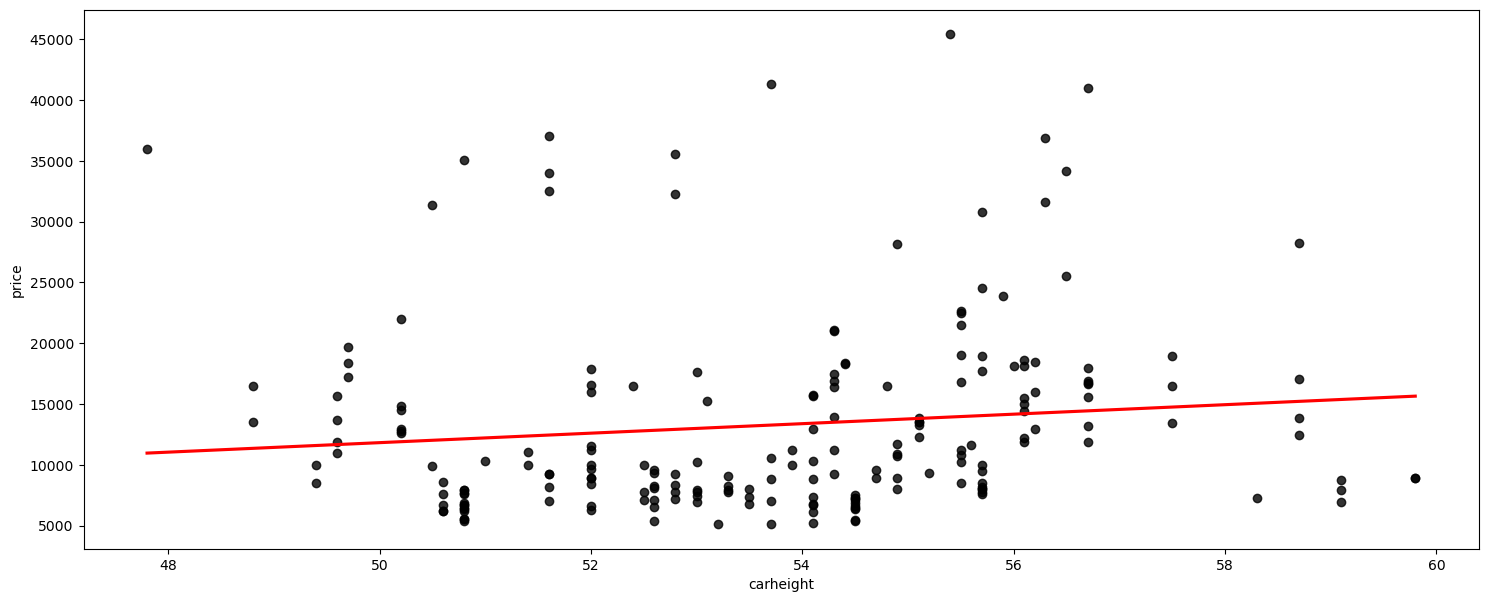

In [522]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='carheight', y='price', ci=None, color='black', line_kws={"color": "r"}) #Даграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> Так, высота ТС незначительно влияет на еоо цену

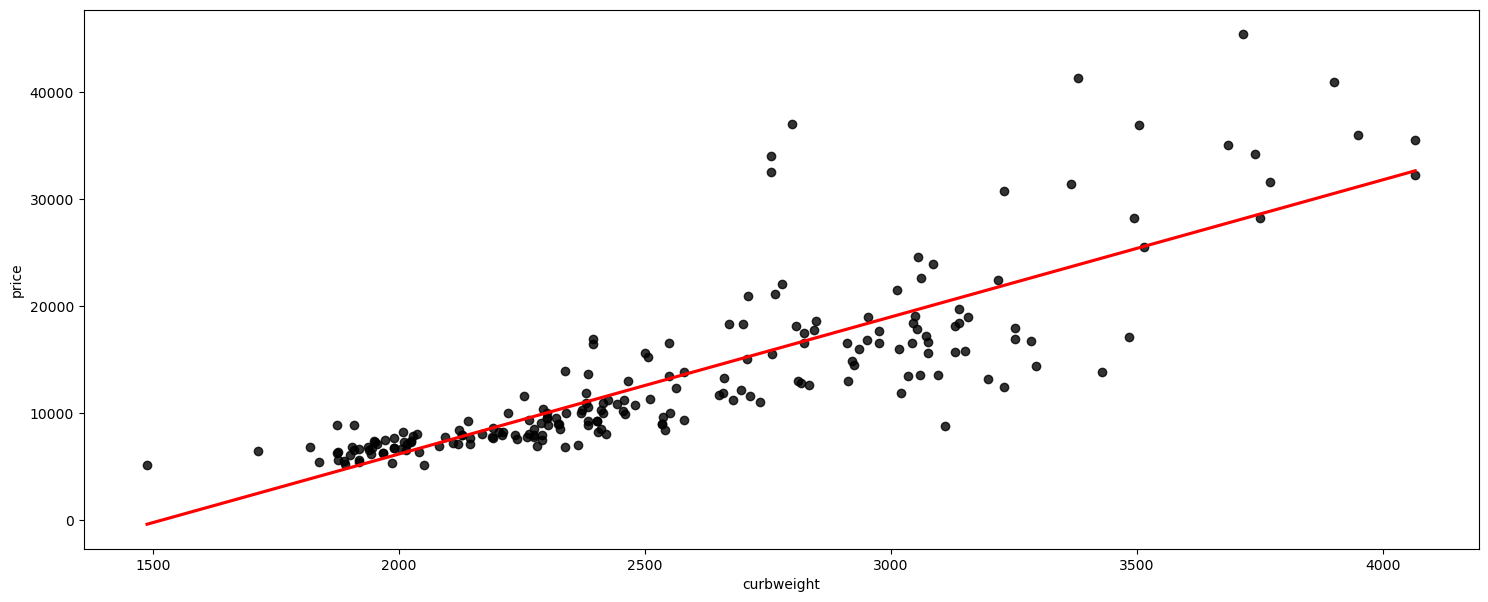

In [523]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='curbweight', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> Так, более высокий показатель снаряжённой массы ТС отражается на его уене в сторону её поавшения

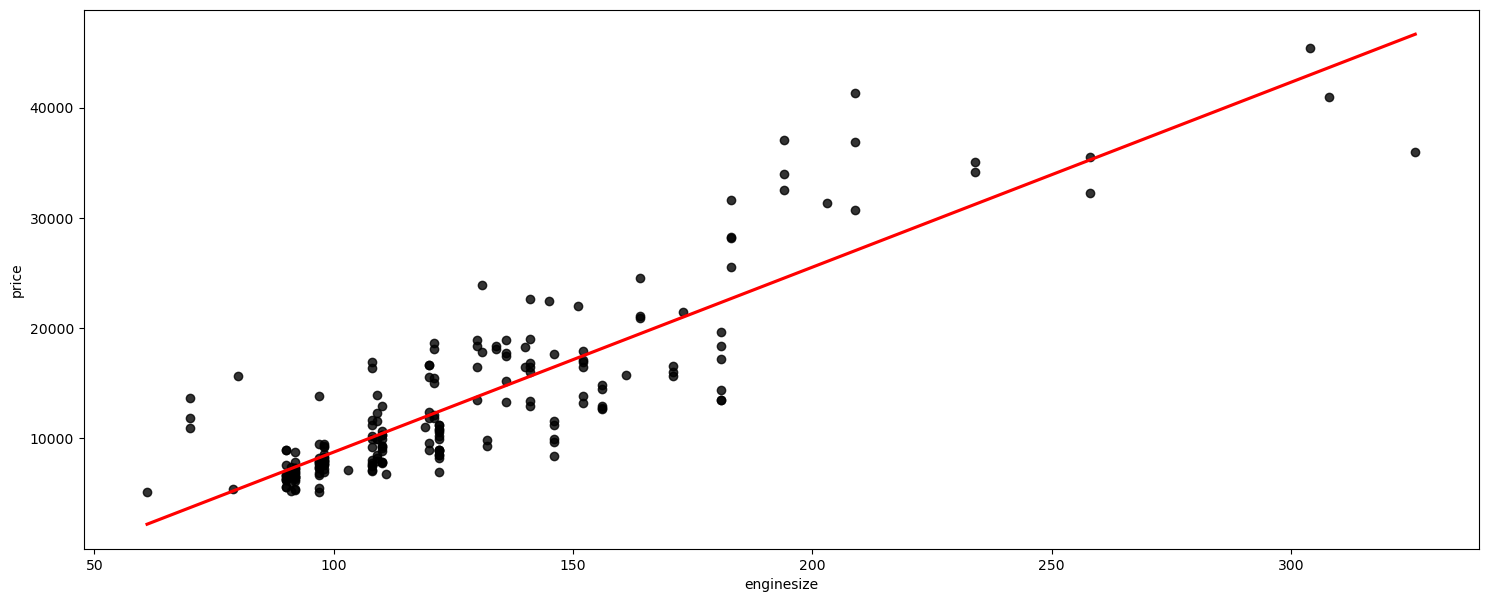

In [524]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='enginesize', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> При большем объёме двигателя, уена значительно увеличивается

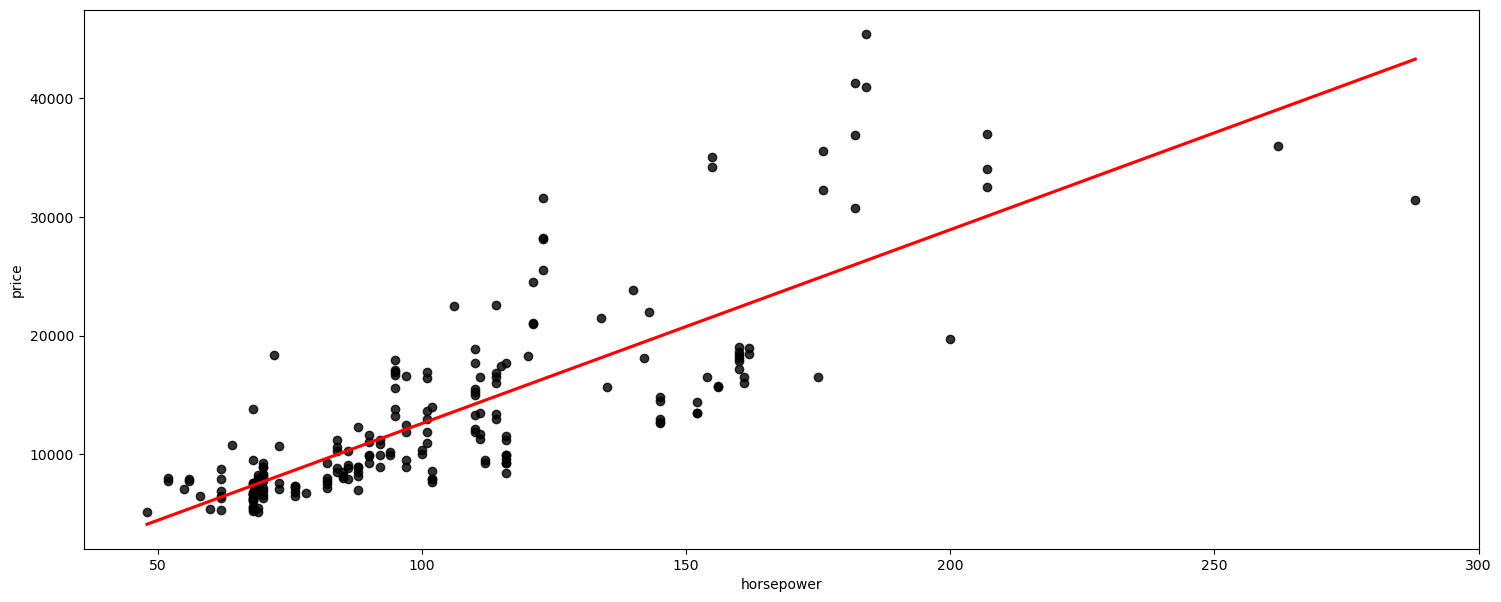

In [525]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='horsepower', y='price', ci=None, color='black', line_kws={"color": "r"}) #Диаграма рассеяния
plt.show(sns)

##### <span style="color:gray"> Таким образом, количество лошадиных сил ТС значительно отражается на его цене, и при большем показателе, цена выше

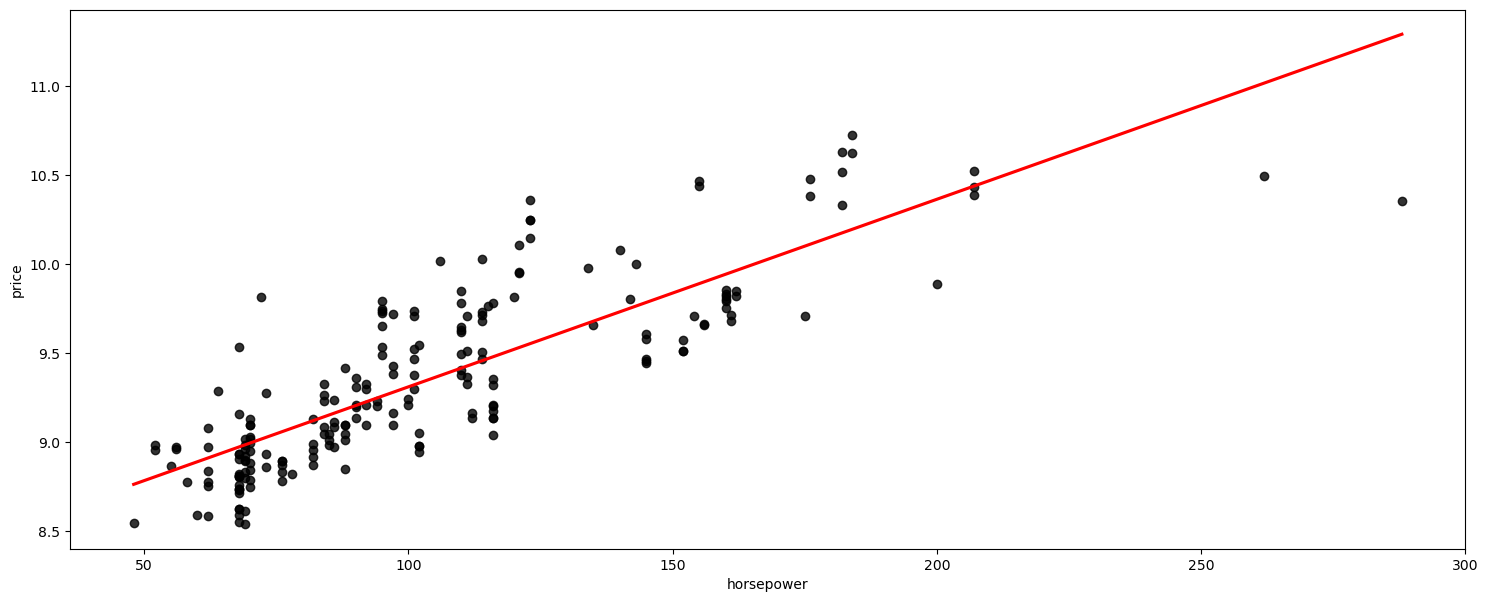

In [526]:
plt.figure(figsize=(18,7))
sns.regplot(data=df_cars, x='horsepower', y=np.log(df_cars['price']), ci=None, color='black', line_kws={"color": "r"}) #Диаграмма рассеяния
plt.show(sns)

##### <span style="color:gray"> Так, при увеличении количества лошадиных сил на 1% , цена растёт

# Специфицируем модель

##### Необходимо проанализировать зависимости стоимости автомобиля от таких параметров, как колёсная база, длина ТС, ширина ТС, снаряжённая масса ТС, объём двигателя ТС и количество лошадиных сил

$$
price = \beta_0+ \beta_1*wheelbase + \beta_2*carlength + \beta_3*carwidth + \beta_4*curbweight + \beta_5*carheight + \beta_6*enginesize + \beta_7*horsepower
$$

In [539]:
price_eq = smf.ols(formula='price~wheelbase+carlength+carwidth+curbweight+carheight+enginesize+horsepower', data=df_cars).fit() # специфицируем модель через формулу
price.params.round(2) # коэфициенты модели с округлением

Intercept    -54342.39
wheelbase        43.35
carlength       -77.37
carwidth        644.43
curbweight        2.38
carheight       213.73
enginesize       85.51
horsepower       56.90
dtype: float64

$$
price = -54342.39 + 43.35*wheelbase - 77.37*carlength + 644.43*carwidth + 2.38*curbweight + 213.73*carheight + 85.51*enginesize + 56.90*horsepower
$$

##### <span style="color:white"> Intercept - это константа, которая показывает, что если все независимые переменные равны нулю, то зависимая переменная будет равна этому значению. В данном случае, если все независимые переменные равны нулю, то цена автомобиля будет отрицательной и равной -45156.54. ТАкая ситуация невозможна, поэтому этот коэффициент не имеет практического значения.

## Интерпретация коэффициентов:
1. При увеличении длины колёсной базы на единицу цена автомобиля увеличится на 43.35 долларов.
2. Увеличение длины автомобиля на единицу приведет к уменьшению цены автомобиля на 77.37 долларов.
3. Увеличение ширины автомобиля на единицу приведет к увеличению цены автомобиля на 644.43 доллара.
4. Увеличение снаряжённой массы автомобиля на единицу приведет к увеличению цены автомобиля на 2.38 доллара.
5. Увеличение показателя, выражающего высоту автомобиля приведет к повышению цены на 213.73 доллара
6. Увеличение объёма двигателя на единицу приведет к увеличению цены автомобиля на 85.51 доллар.
7. Увеличение мощности двигателя на единицу приведет к увеличению цены автомобиля на 56.90 долларов.

# Вычислим коэффиценты детерминации

In [540]:
# TSS - общий расброс данных (общая сумма квадратов)
TSS = price_eq.centered_tss.round(3)
print("TSS =", TSS)

TSS = 13019639361.993


In [541]:
# ESS - часть разброса, объясняемая моделью (объяснённая сумма квадратов)
ESS = price_eq.ess.round(3)
print("ESS =", ESS)

ESS = 10716395396.636


In [542]:
# RSS -  часть разброса, которую нельзя объяснить моделью (остаточная сумма квадратов)
RSS = price_eq.ssr.round(3)
print("RSS =", RSS)

RSS = 2303243965.357


In [543]:
RSS = TSS - ESS
print("RSS =", RSS)

RSS = 2303243965.3570004


In [567]:
# R^2 - какая доля дисперсии целевой переменной объяснена моделью (насколько хорошо модель соответствует данным)
R2 = price_eq.rsquared.round(3)
print("R^2 =", R2)

R^2 = 0.823


In [545]:
R2 = ESS/TSS 
print("R^2 =", R2)

R^2 = 0.8230946417701367


##### <span style="color:gray"> Так, значение R^2 = 0,82, из чего следует сделать вывод, что 82% дисперсии в цене ТС объясняется задействованными переменными

In [568]:
# adj R^2 - насколько хорошо модель соответствует данным, учитывая количество переменных (adj R^2 = 1 => модель идеально соответсвтвует данным)
R2_adj = price.rsquared_adj.round(2)
print("R^2_adj =", R2_adj)

R^2_adj = 0.82


##### <span style="color:gray"> Так, значение R^2_adj = 0,82, что достаточно близко к значению "1", из чего следует сделать вывод, что исследуемая модель соответствует данным достаточно хорошо

In [547]:
n = 205 # observations
k = 8
SER = np.sqrt(RSS/(n-k-1))
print("SER =", SER.round(3))

SER = 3428.009


# Значимость коэффициентов (t-тест)

In [403]:
model = smf.ols('price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower',data = df_cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 17 May 2023   Prob (F-statistic):           3.57e-71
Time:                        02:08:39   Log-Likelihood:                -1956.1
No. Observations:                 205   AIC:                             3926.
Df Residuals:                     198   BIC:                             3949.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.516e+04   1.29e+04     -3.512      0.001   -7.05e+04   -1.98e+04
wheelbase     95.3145     98.318      0.969      0.334     -98.570     289.199
carlength    -58.1750     53.685     -1.084      0.280    -164.043      47.693
carwidth     556.6265    253.009      2.200      0.029      57.687    1055.566
curbweight     2.4925      1.556      1.602      0.111      -0.575       5.560
enginesize    82.9085     12.709      6.523      0.000      57.846     107.971
horsepower    53.4797     12.477      4.286      0.000      28.874      78.085
==============================================================================
Omnibus:                       31.179   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.921
Skew:                           0.702   Prob(JB):                     1.08e-15
Kurtosis:                       5.469   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [405]:
model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.516e+04,1.29e+04,-3.512,0.001,-7.05e+04,-1.98e+04
wheelbase,95.3145,98.318,0.969,0.334,-98.570,289.199
carlength,-58.1750,53.685,-1.084,0.280,-164.043,47.693
carwidth,556.6265,253.009,2.200,0.029,57.687,1055.566
curbweight,2.4925,1.556,1.602,0.111,-0.575,5.560
enginesize,82.9085,12.709,6.523,0.000,57.846,107.971
horsepower,53.4797,12.477,4.286,0.000,28.874,78.085


## Гипотеза: 
$ H_0: \beta_{p} = 0 $ 

$ H_1: \beta_{p} \neq 0 $ 

In [559]:
check = '''
Names	coef	std_err	t_nabl
Intercept	-4.516e+04	1.29e+04	-3.512
wheelbase	95.3145	98.318	0.969
carlength	-58.1750	53.685	-1.084
carwidth	556.6265	253.009	2.200
curbweight	2.4925	1.556	1.602
enginesize	82.9085	12.709	6.523
horsepower	53.4797	12.477	4.286
'''

In [594]:
minidf_cars = pd.read_csv(io.StringIO(check), sep='\s+')
minidf_cars

,Names,coef,std_err,t_nabl
0,Intercept,-45160.0000,12900.000,-3.512
1,wheelbase,95.3145,98.318,0.969
2,carlength,-58.1750,53.685,-1.084
3,carwidth,556.6265,253.009,2.200
4,curbweight,2.4925,1.556,1.602
5,enginesize,82.9085,12.709,6.523
6,horsepower,53.4797,12.477,4.286


In [595]:
alpha = 0.05 #коэффициент значимости
t_crit=stats.t.ppf(1-alpha/2, 205-6-1)
print("t_crit =", round(t_crit,3))

t_crit = 1.972


In [596]:
minidf_cars['Znachimost'] = minidf_cars.apply(lambda x: 'znachim' if np.abs(x['t_nabl'])>t_crit else 'ne znachim', axis=1)
minidf_cars

,Names,coef,std_err,t_nabl,Znachimost
0,Intercept,-45160.0000,12900.000,-3.512,znachim
1,wheelbase,95.3145,98.318,0.969,ne znachim
2,carlength,-58.1750,53.685,-1.084,ne znachim
3,carwidth,556.6265,253.009,2.200,znachim
4,curbweight,2.4925,1.556,1.602,ne znachim
5,enginesize,82.9085,12.709,6.523,znachim
6,horsepower,53.4797,12.477,4.286,znachim


##### <span style="color:gray"> Так, коэффициенты "Intercept", "Carwidth", "Enginesize" и "Horsepower" являются значимыми

# Совместная значимость (F-тест)

## Гипотеза:
$ H_0: \beta_{0} = \beta_{1} = ... = \beta_{k} = 0 $

$ H_1: \beta_{0}^2 + \beta_{1}^2 + ... + \beta_{k}^2 > 0 $

In [597]:
model.fvalue.round(3) # Результаты F-теста на значимость регрессии

151.419

In [598]:
model.f_pvalue

3.5657826737729397e-71

In [599]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)', 'R2                      0.823          0.821'))
print("unrest =", unrest, ", rest =", rest)

unrest = 0.823 , rest = 0.821


In [600]:
F_nabl = (unrest - rest)/(1-unrest)*(205-7)/(2)
print("F_nabl =", round(F_nabl,3))

F_nabl = 1.119


In [601]:
alpha=0.05
F_crit=stats.f.ppf(1-alpha, 7, 205-7)
print("F_crit =", round(F_crit,3))

F_crit = 2.056


##### <span style="color:gray"> $F_{nabl}<F_{crit}$, следовательно, данные согласуются с гипотезой $H_{0}$. 

##### <span style="color:gray"> Коэффициенты совместно незначимы.

# F-тест: структурные изменения/сдвиги

In [612]:
cleanup_nums = {"fueltype": {'gas': '1', 'diesel': '0'}}
df_cars = df_cars.replace(cleanup_nums)
df_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [616]:
# Фильтруем df по типу топлива
cars_gas = df_cars[df_cars['fueltype']==1]# df для gas
cars_diesel = df_cars[df_cars['fueltype']==0] # df для diesel

In [658]:
crs = smf.ols(data= df_cars, formula='price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()
crs_gas = smf.ols(data= cars_gas, formula='price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()
crs_diesel = smf.ols(data= cars_diesel, formula='price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()

ValueError: zero-size array to reduction operation maximum which has no identity

In [618]:
print(f'RSS:{crs.ssr.round(2)}, RSS_1:{crs_gas.ssr.round(2)},RSS_2:{crs_diesel.ssr.round(2)} ')

NameError: name 'crs_gas' is not defined

In [619]:
F_nabl=(crs.ssr-(crs_gas.ssr+crs_diesel.ssr))/(crs_gas.ssr+crs_diesel.ssr)*(len(cars_gas)+len(cars_diesel)-2*7)/(7)
F_nabl.round(2)

NameError: name 'crs_gas' is not defined

In [620]:
alpha=0.05
F_crit=stats.f.ppf(1-alpha, 7, 205-7) # (доверительный интервал; количество коэффициентов; количество степеней свободы)
F_crit.round(3)

2.056

##### <span style="color:gray"> $F_{nabl}<F_{crit}$, следовательно, данные согласуются с гипотезой $H_{0}$. 

##### <span style="color:gray"> Структурые различия незначимы.

<Figure size 1800x700 with 0 Axes>

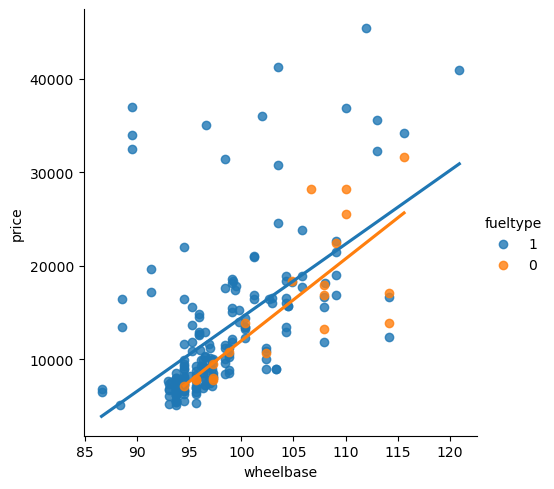

In [624]:
plt.figure(figsize=(18,7))
sns.lmplot(data=df_cars, x='wheelbase', y='price', ci=None, hue='fueltype')
plt.show(sns)

<Figure size 1800x700 with 0 Axes>

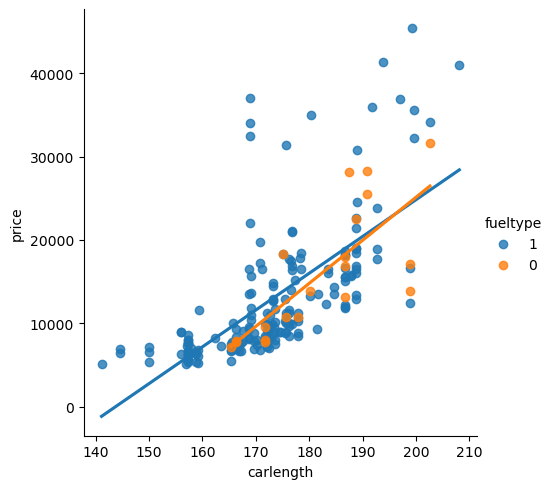

In [625]:
plt.figure(figsize=(18,7))
sns.lmplot(data=df_cars, x='carlength', y='price', ci=None, hue='fueltype')
plt.show(sns)

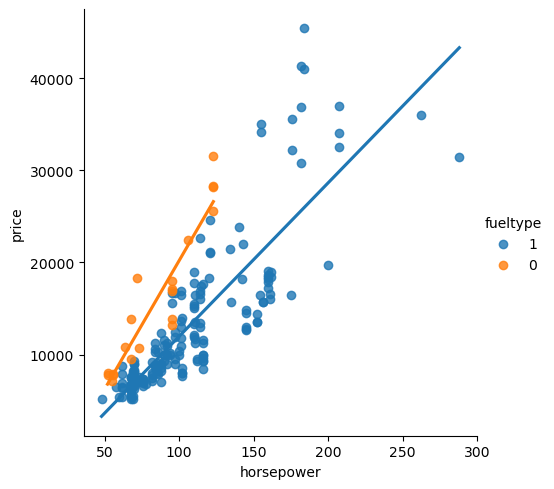

<Figure size 1800x700 with 0 Axes>

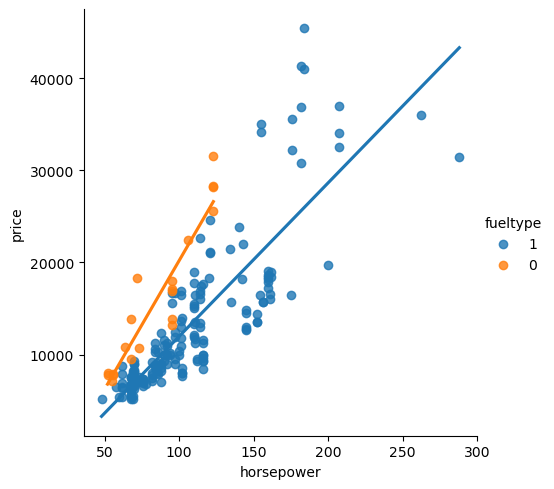

In [623]:
plt.figure(figsize=(18,7))
sns.lmplot(data=df_cars, x='horsepower', y='price', ci=None, hue='fueltype')
plt.show(sns)

# Прогнозирование для модели регрессии

In [627]:
df_cars2 = df_cars.sample(10)
df_cars2 = df_cars2.drop(labels={'CompanyName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype'}, axis=1)
df_cars2

,car_ID,symboling,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
116,117,0,0,107.9,186.7,68.4,56.7,3252,four,152,idi,3.70,3.52,21.0,95,4150,28,33,17950.0
169,170,2,1,98.4,176.2,65.6,52.0,2551,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0
149,150,0,1,96.9,173.6,65.4,54.9,2650,four,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694.0
61,62,1,1,98.8,177.8,66.5,53.7,2385,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595.0
134,135,3,1,99.1,186.6,66.5,56.1,2707,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
54,55,1,1,93.1,166.8,64.2,54.1,1950,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0
137,138,2,1,99.1,186.6,66.5,56.1,2847,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620.0
109,110,0,1,114.2,198.9,68.4,58.7,3230,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
75,76,1,1,102.7,178.4,68.0,54.8,2910,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
110,111,0,0,114.2,198.9,68.4,58.7,3430,four,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0


In [629]:
model.predict(exog=df_cars2, transform=True)

116    18128.158304
169    15153.332673
149    11879.125574
61     11484.432948
134    13111.235738
54      5790.747050
137    16134.169482
109    15417.956074
75     20323.760894
110    18462.569923
dtype: float64

# Мультиколлинеарность

In [630]:
# основная регрессия
model = smf.ols(data = df_cars , formula = 'price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()
# проверяем, как основная регрессия зависит от других
model_1 = smf.ols(data = df_cars , formula = 'wheelbase~carlength+carwidth+curbweight+enginesize+horsepower').fit()
model_2 = smf.ols(data = df_cars , formula = 'carlength~wheelbase+carwidth+curbweight+enginesize+horsepower').fit()
model_3 = smf.ols(data = df_cars , formula = 'horsepower~price+wheelbase+carlength+carwidth+curbweight+enginesize').fit()
model_1.params.round(3)

Intercept    -6.456
carlength     0.277
carwidth      0.820
curbweight    0.003
enginesize    0.007
horsepower   -0.061
dtype: float64

In [632]:
VIF_1 = 1/(1 - model_1.rsquared)
VIF_1.round(2)

6.08

In [633]:
VIF_2 = 1/(1 - model_2.rsquared)
VIF_2.round(2)

7.61

In [634]:
VIF_3 = 1/(1 - model_3.rsquared)
VIF_3.round(2)

4.61

In [636]:
variance_inflation_factor(model.model.exog, 2) # 2 - номер регрессора в спецификации, VIF для которого мы вычисляем

7.605624082917361

In [635]:
summary_params(model)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-45156.538510,12856.573306,-3.512331,5.501892e-04,-70509.925774,-19803.151245
wheelbase,95.314467,98.318023,0.969451,3.335031e-01,-98.570393,289.199328
carlength,-58.174972,53.685149,-1.083633,2.798456e-01,-164.043024,47.693079
carwidth,556.626532,253.009447,2.200023,2.896230e-02,57.687480,1055.565584
curbweight,2.492501,1.555655,1.602219,1.107013e-01,-0.575279,5.560281
enginesize,82.908532,12.709271,6.523469,5.612079e-10,57.845627,107.971438
horsepower,53.479673,12.477400,4.286123,2.837144e-05,28.874022,78.085324


In [639]:
# Матрица корреляций
df_cars = df_cars[['wheelbase', 'carlength', 'horsepower']].copy()
corr_matrix = df_cars.corr().round(3) # вычисляет попарную корреляцию для кжд коэффициента
corr_matrix
plt.show(sns)

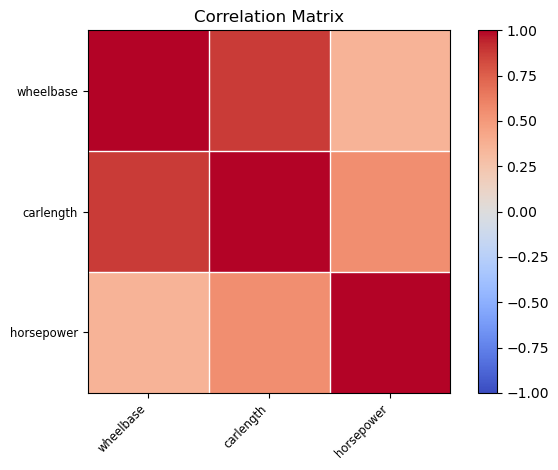

In [640]:
# визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df_cars.columns, normcolor=True, cmap='coolwarm')
plt.show()

In [657]:
df_all = pd.get_dummies(df_cars.loc[:,['wheelbase','carlength','carwidth','carheight','curbweight', 'cylindernumber', 'enginesize']])
df_all

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,0,0,1,0,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,0,0,1,0,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,0,0,0,1,0,0,0
203,109.1,188.8,68.9,55.5,3217,145,0,0,0,1,0,0,0


In [654]:
model = smf.ols(data = df_cars, formula = 'price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()
hat_y = model.predict()

In [660]:
df_cars['price2'] = pd.Series(model.predict()**2)
df_cars['price3'] = pd.Series(model.predict()**3)
df_cars['price4'] = pd.Series(model.predict()**4)
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price2,price3,price4
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,1.491670e+08,1.821835e+12,2.225079e+16
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,1.491670e+08,1.821835e+12,2.225079e+16
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,3.321308e+08,6.052905e+12,1.103109e+17
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,1.265119e+08,1.422975e+12,1.600527e+16
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,2.392765e+08,3.701265e+12,5.725326e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,3.152418e+08,5.597135e+12,9.937742e+16
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,4.162100e+08,8.491195e+12,1.732308e+17
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,4.677387e+08,1.011591e+13,2.187795e+17
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,3.355990e+08,6.147959e+12,1.126267e+17


In [661]:
df_cars.dropna()
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price2,price3,price4
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,1.491670e+08,1.821835e+12,2.225079e+16
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,1.491670e+08,1.821835e+12,2.225079e+16
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,3.321308e+08,6.052905e+12,1.103109e+17
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,1.265119e+08,1.422975e+12,1.600527e+16
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,2.392765e+08,3.701265e+12,5.725326e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,3.152418e+08,5.597135e+12,9.937742e+16
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,4.162100e+08,8.491195e+12,1.732308e+17
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,4.677387e+08,1.011591e+13,2.187795e+17
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,3.355990e+08,6.147959e+12,1.126267e+17


In [680]:
model2=smf.ols(data=df_cars,formula = 'price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower+price2+price3+price4').fit()
model2.params

Intercept     1.719689e-03
wheelbase     1.813963e-01
carlength     2.730761e-01
carwidth      1.091198e-01
curbweight    3.283631e+00
enginesize    1.382861e-01
horsepower    7.970279e-02
price2        1.181070e-06
price3        1.862940e-09
price4       -3.676031e-14
dtype: float64

In [681]:
R2_unres = model2.rsquared
R2_res = model.rsquared

In [682]:
F_nabl = (R2_unres-R2_res)/(1-R2_unres)*(len(df_cars)-10)/3
F_nabl.round(3)

9.535

In [683]:
alpha=0.05
F_cr= stats.f.ppf (1-alpha, 3, len(df_cars)-10)
F_cr

2.6509137185234852

$$
H_{0}:\gamma_{1}=\gamma_{2}=\gamma_{3}=0
$$
$$
H_{1}:\gamma_{1}^2+\gamma_{2}^2+\gamma_{3}^2>0
$$

$$ 
F_{crit}<F_{nabl}=>H_{0} отвергаем 
$$

# Гетероскедастичность

In [686]:
model = smf.ols(data=df_cars, formula='price~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()

In [687]:
model.resid

0      1281.606494
1      4286.606494
2     -1724.457428
3      2702.247428
4      1981.433908
          ...     
200    -910.051180
201   -1356.226047
202    -142.267720
203    4150.639366
204    4595.773735
Length: 205, dtype: float64

In [689]:
# квадраты остатков добавим в датафрейм, воспользовавшись методом '.resid', возвращающий значения остатков
df_cars['res2']=model.resid**2
df_cars['res']=model.resid

In [690]:
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,price2,price3,price4,res2,res
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,1.491670e+08,1.821835e+12,2.225079e+16,1.642515e+06,1281.606494
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,1.491670e+08,1.821835e+12,2.225079e+16,1.837500e+07,4286.606494
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,3.321308e+08,6.052905e+12,1.103109e+17,2.973753e+06,-1724.457428
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,1.265119e+08,1.422975e+12,1.600527e+16,7.302141e+06,2702.247428
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,2.392765e+08,3.701265e+12,5.725326e+16,3.926080e+06,1981.433908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,114,5400,23,28,16845.0,3.152418e+08,5.597135e+12,9.937742e+16,8.281932e+05,-910.051180
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,160,5300,19,25,19045.0,4.162100e+08,8.491195e+12,1.732308e+17,1.839349e+06,-1356.226047
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,134,5500,18,23,21485.0,4.677387e+08,1.011591e+13,2.187795e+17,2.024010e+04,-142.267720
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,106,4800,26,27,22470.0,3.355990e+08,6.147959e+12,1.126267e+17,1.722781e+07,4150.639366


In [692]:
sub_model = smf.ols(data=df_cars, formula='res2~wheelbase+carlength+carwidth+curbweight+enginesize+horsepower').fit()

In [693]:
# наблюдаемое значение
np.round(len(df_cars)*sub_model.rsquared, 2) #Len(df) - количество измерений

74.81

In [694]:
# критическое значение
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

##### <span style="color:gray"> Тест указывает на гетероскедастичность